Importing Libraries and Dataset

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t as t_dist
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

##### About variance inflation factor (VIF) - https://online.stat.psu.edu/stat462/node/180/

### 1. Load the Car dataset

Make
Model
Year
Engine Fuel Type
Engine HP
Engine Cylinders
Transmission Type
Driven_Wheels
Number of Doors
Market Category
Vehicle Size
Vehicle Style
highway MPG
city mpg
Popularity
MSRP

In [162]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [163]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (11914, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-

Calculate summary statistics such as mean, median, mode, minimum, maximum, and standard deviation for numerical columns like 'Engine HP', 'highway MPG', 'city mpg', 'Popularity', and 'MSRP'.

In [164]:
print("Descriptive Statistics:")
print(df[['Engine HP', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']].describe())

Descriptive Statistics:
         Engine HP   highway MPG      city mpg    Popularity          MSRP
count  11845.00000  11914.000000  11914.000000  11914.000000  1.191400e+04
mean     249.38607     26.637485     19.733255   1554.911197  4.059474e+04
std      109.19187      8.863001      8.987798   1441.855347  6.010910e+04
min       55.00000     12.000000      7.000000      2.000000  2.000000e+03
25%      170.00000     22.000000     16.000000    549.000000  2.100000e+04
50%      227.00000     26.000000     18.000000   1385.000000  2.999500e+04
75%      300.00000     30.000000     22.000000   2009.000000  4.223125e+04
max     1001.00000    354.000000    137.000000   5657.000000  2.065902e+06


### 2. Clearing data

As we may see, there are duplicates in the dataset and we will need to get rid of them.

In [165]:
df.duplicated().sum()

715

In [166]:
df = df.drop_duplicates()
df.duplicated().sum()


0

Checking for null values

In [167]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [168]:
df['Market Category'].nunique()

71

Dropping column Market Category because it has more than 20% null values and has combined nominal values with 71 unique values with car categories that is hard to interpret and visualize

In [169]:
df.drop(columns={'Market Category'}, axis=1, inplace=True) 

There are still some columns with null values

In [170]:
row_cylinder_null = df[df['Engine Cylinders'].isnull()]
row_cylinder_null

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,NaN,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Midsize,4dr SUV,74,78,2031,49800


Setting number of cylinders of electric cars to 0 to get rid of some null values

In [171]:
df.loc[df['Engine Fuel Type'] == 'electric', 'Engine Cylinders'] = 0

row_cylinder_null = df[df['Engine Cylinders'].isnull()]
row_cylinder_null

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8695,Mazda,RX-7,1993,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,7523
8696,Mazda,RX-7,1994,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,8147
8697,Mazda,RX-7,1995,regular unleaded,255.0,NaN,MANUAL,rear wheel drive,2.0,Compact,Coupe,23,15,586,8839
8698,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,31930
8699,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,26435
8700,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,27860
8701,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,31000
8702,Mazda,RX-8,2009,premium unleaded (required),232.0,NaN,MANUAL,rear wheel drive,4.0,Compact,Coupe,22,16,586,26435
8703,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,31700
8704,Mazda,RX-8,2009,premium unleaded (required),212.0,NaN,AUTOMATIC,rear wheel drive,4.0,Compact,Coupe,23,16,586,28560


Browsing in goole for mazda models RX 7 and RX 8 we decided to fill old cars up to year 1995 models with 2 cylinders and new models with 4 cylinders. It is a little incorrect but better that nothing. <br>
We cannot put here average or something like that because it is a specific attribute

In [172]:
df.loc[df['Year'] <= 1995, 'Engine Cylinders'] = df.loc[df['Year'] <= 1995, 'Engine Cylinders'].fillna(2)
df.loc[df['Year'] > 1995, 'Engine Cylinders'] = df.loc[df['Year'] > 1995, 'Engine Cylinders'].fillna(4)

In [173]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders      0
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [174]:
hp_cylinder_null = df[df['Engine HP'].isnull()]
hp_cylinder_null



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950


We fill NAN values for horse power with average horse power for each firm with NAN for horse power records and for each engine fuel type <br>
Then we mapped average horse power to NAN values for the same firm and the same engine fuel type

In [175]:
firms_with_null_hp = hp_cylinder_null[['Make', 'Engine HP']]
specified_firms = firms_with_null_hp['Make'].unique().tolist()

temp_df_for_calculating_hp = df[df['Make'].isin(specified_firms)]

avg_hp_by_fuel_type = temp_df_for_calculating_hp.groupby('Engine Fuel Type')['Engine HP'].mean()

avg_hp_by_fuel_type



Engine Fuel Type
diesel                              182.846154
electric                            146.928571
flex-fuel (unleaded/E85)            289.377323
flex-fuel (unleaded/natural gas)           NaN
natural gas                         110.000000
premium unleaded (recommended)      296.102837
premium unleaded (required)         379.129108
regular unleaded                    214.417482
Name: Engine HP, dtype: float64

In [176]:
for fuel_type, avg_hp in avg_hp_by_fuel_type.items():
    df.loc[(df['Engine Fuel Type'] == fuel_type) & (df['Engine HP'].isnull()), 'Engine HP'] = avg_hp

hp_cylinder_null = df[df['Engine HP'].isnull()]
hp_cylinder_null


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5825,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,40660
5830,Chevrolet,Impala,2015,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,37535
5831,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,40810
5833,Chevrolet,Impala,2016,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,37570
5839,Chevrolet,Impala,2017,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,37675
5840,Chevrolet,Impala,2017,flex-fuel (unleaded/natural gas),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Large,Sedan,25,17,1385,40915


There are still NAN values for pretty simmilar cars horse power so we googled cars models and get the result that it has 196 HP and fill it

In [177]:
df['Engine HP'].fillna(196, inplace=True)
df.isnull().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [178]:
fuel_type_null = df[df['Engine Fuel Type'].isnull()]
fuel_type_null

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


We browse in goole and checked its fuel type - regular unleaded and fill with it the remaining null values

In [179]:
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Filling number of doors NANs with mode number of doors

In [180]:
mode_doors = df['Number of Doors'].mode()[0] 


df['Number of Doors'] = df['Number of Doors'].fillna(mode_doors)


df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Drop rows with UNKNOWN Transmission Type

In [181]:
df.shape

(11199, 15)

In [182]:
df = df[df['Transmission Type'] != 'UNKNOWN']
df.shape

(11187, 15)

Renaming columns

In [183]:
df = df.rename(columns={'Make': 'Firm', 'MSRP': 'Price', 'Engine Fuel Type': 'Fuel type', 'Engine HP': 'Horsepower', 'city mpg': 'city MPG'})
df

,Firm,Model,Year,Fuel type,Horsepower,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city MPG,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


Inflation calculation for price and seting adjusted price

In [184]:
base_year = 2024

inflation_rate = 0.0487 

df["Years to Base Year"] = base_year - df["Year"]

df["Discount Factor"] = 1 / ((1 + inflation_rate) ** df["Years to Base Year"])

df["Adjusted Price"] = df["Price"] * df["Discount Factor"]

df["Adjusted Price"].describe()


count     11187.000000
mean      25303.509525
std       34667.928015
min         397.088110
25%       11235.014281
50%       18422.502558
75%       28148.912916
max      965360.285169
Name: Adjusted Price, dtype: float64

### Step 3: Visualizing the data

In [185]:
df["Firm"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [186]:
df['Price'].describe().apply(lambda x: format(x, 'f'))

count      11187.000000
mean       41966.987039
std        61555.203217
min         2000.000000
25%        21622.500000
50%        30695.000000
75%        43050.000000
max      2065902.000000
Name: Price, dtype: object

In [187]:
df['Price'].quantile(0.85)

54016.0

85% of the prices are below 54000$ and the other 15% are higher. There is also 2m$ car worth

In [188]:
max_msrp_rows = df[df['Price'] == df['Price'].max()]

max_msrp_rows

,Firm,Model,Year,Fuel type,Horsepower,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city MPG,Popularity,Price,Years to Base Year,Discount Factor,Adjusted Price
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,Compact,Coupe,14,8,820,2065902,16,0.467283,965360.285169


Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. <br>
City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds. <br>
We convert miles per galon to lites per kilometer mupltiplying by one mile in km and dividing by one gallon in litres for better interpretation in our country

In [189]:
one_mile = 1.609 # in kilometres
one_gallon = 3.785 # in litres

df['highway KPL'] = [mpg * (one_mile / one_gallon) for mpg in df['highway MPG']]
df['city KPL'] = [mpg * (one_mile / one_gallon) for mpg in df['city MPG']]
df

,Firm,Model,Year,Fuel type,Horsepower,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city MPG,Popularity,Price,Years to Base Year,Discount Factor,Adjusted Price,highway KPL,city KPL
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,13,0.538931,24863.601749,11.052576,8.076882
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,13,0.538931,21907.562828,11.902774,8.076882
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,13,0.538931,19590.157658,11.902774,8.501982
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,13,0.538931,15871.530758,11.902774,7.651783
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,13,0.538931,18593.134504,11.902774,7.651783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,12,0.565177,26065.981493,9.777279,6.801585
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,12,0.565177,32028.603018,9.777279,6.801585
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,12,0.565177,28609.279774,9.777279,6.801585
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,11,0.592702,30180.362159,9.777279,6.801585


Distributions

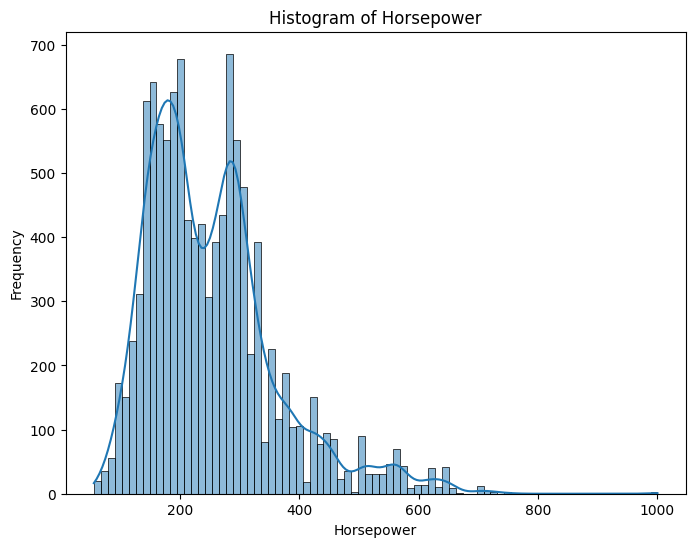

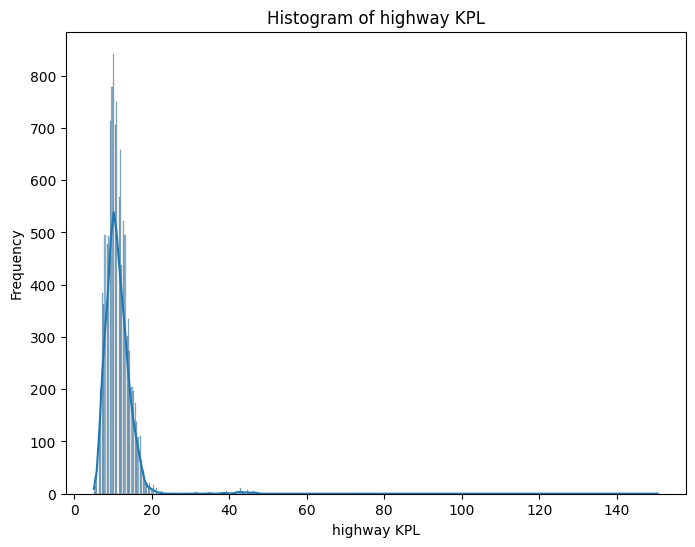

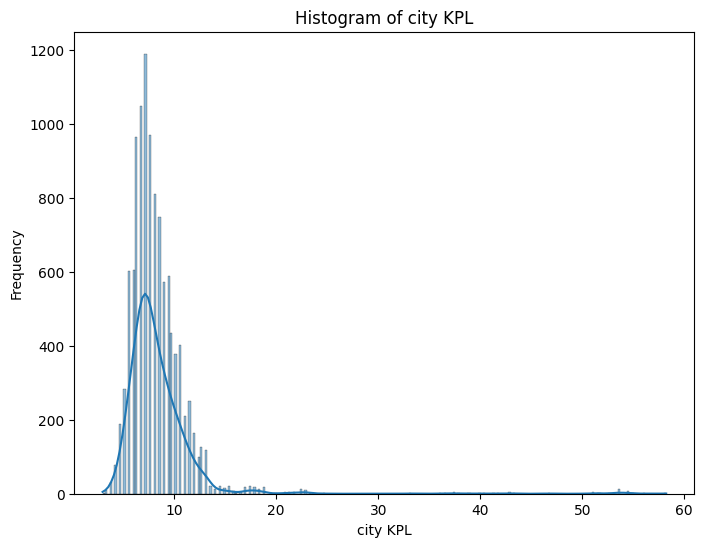

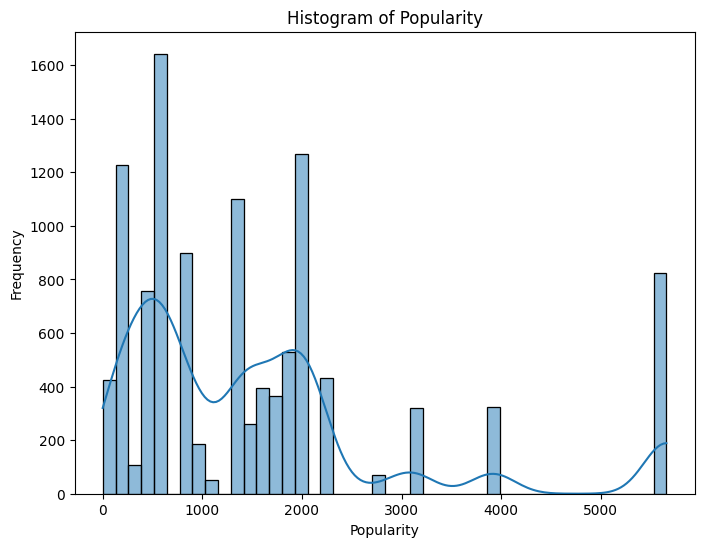

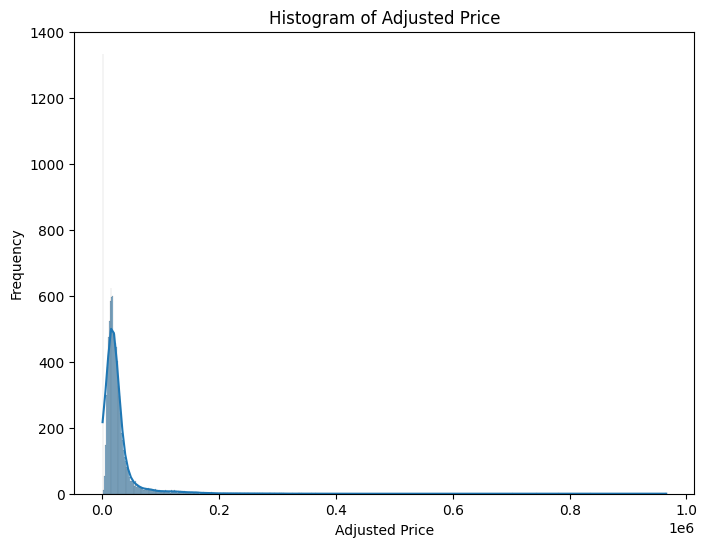

In [190]:
numerical_cols = ['Horsepower', 'highway KPL', 'city KPL', 'Popularity', 'Adjusted Price']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

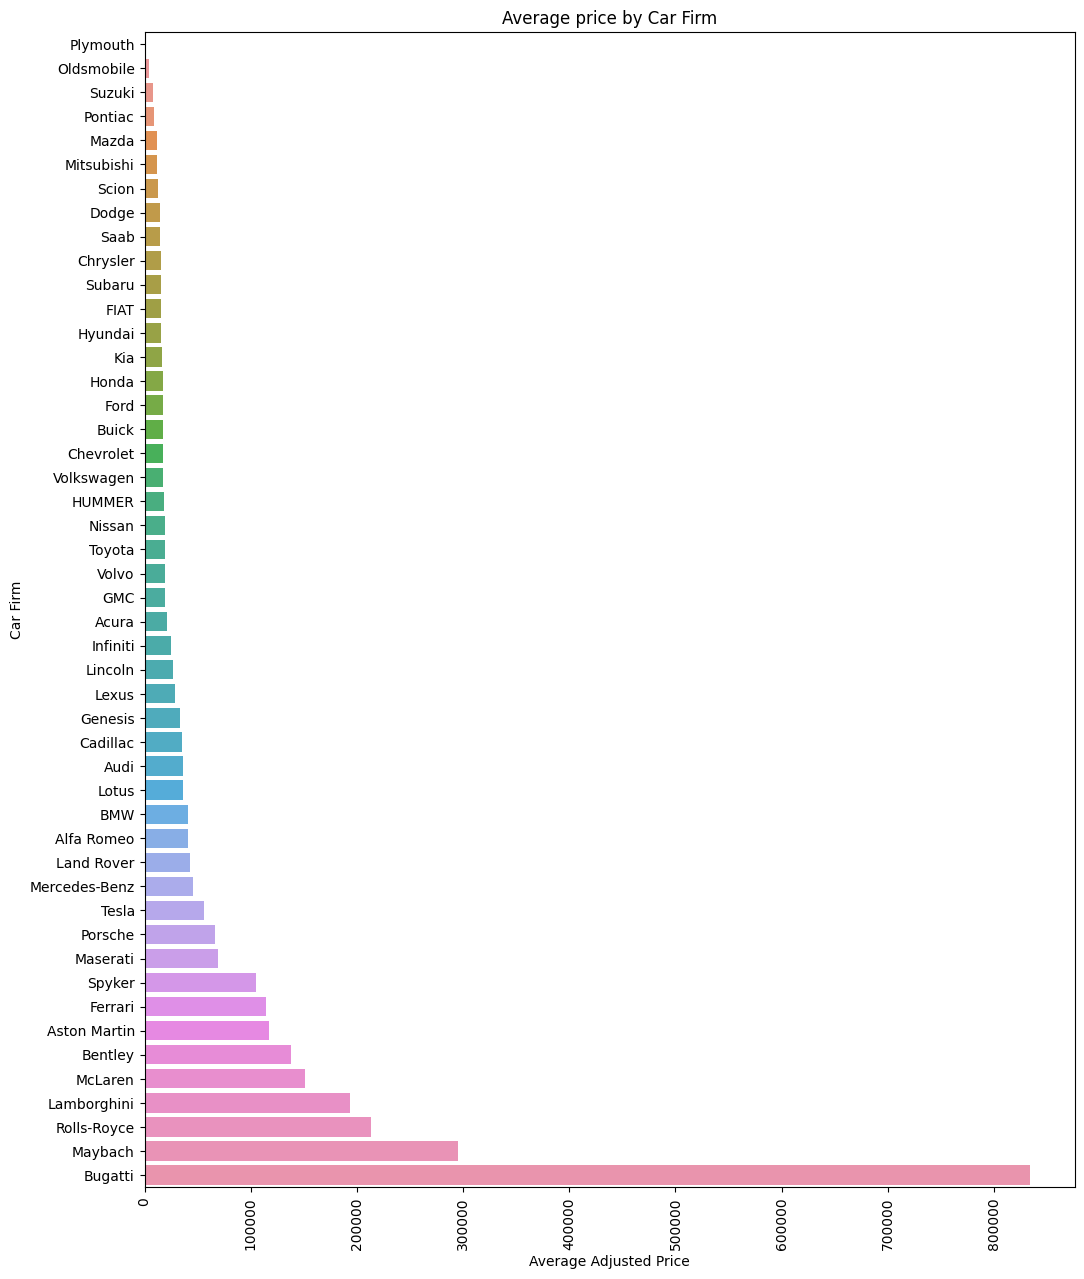

In [191]:
plt.figure(figsize=(12, 15))
sns.barplot(data=df.groupby('Firm')['Adjusted Price'].mean().reset_index().sort_values(by='Adjusted Price'), x='Adjusted Price', y='Firm')
plt.xticks(rotation=90)
plt.title('Average price by Car Firm')
plt.xlabel('Average Adjusted Price')
plt.ylabel('Car Firm')
plt.show()


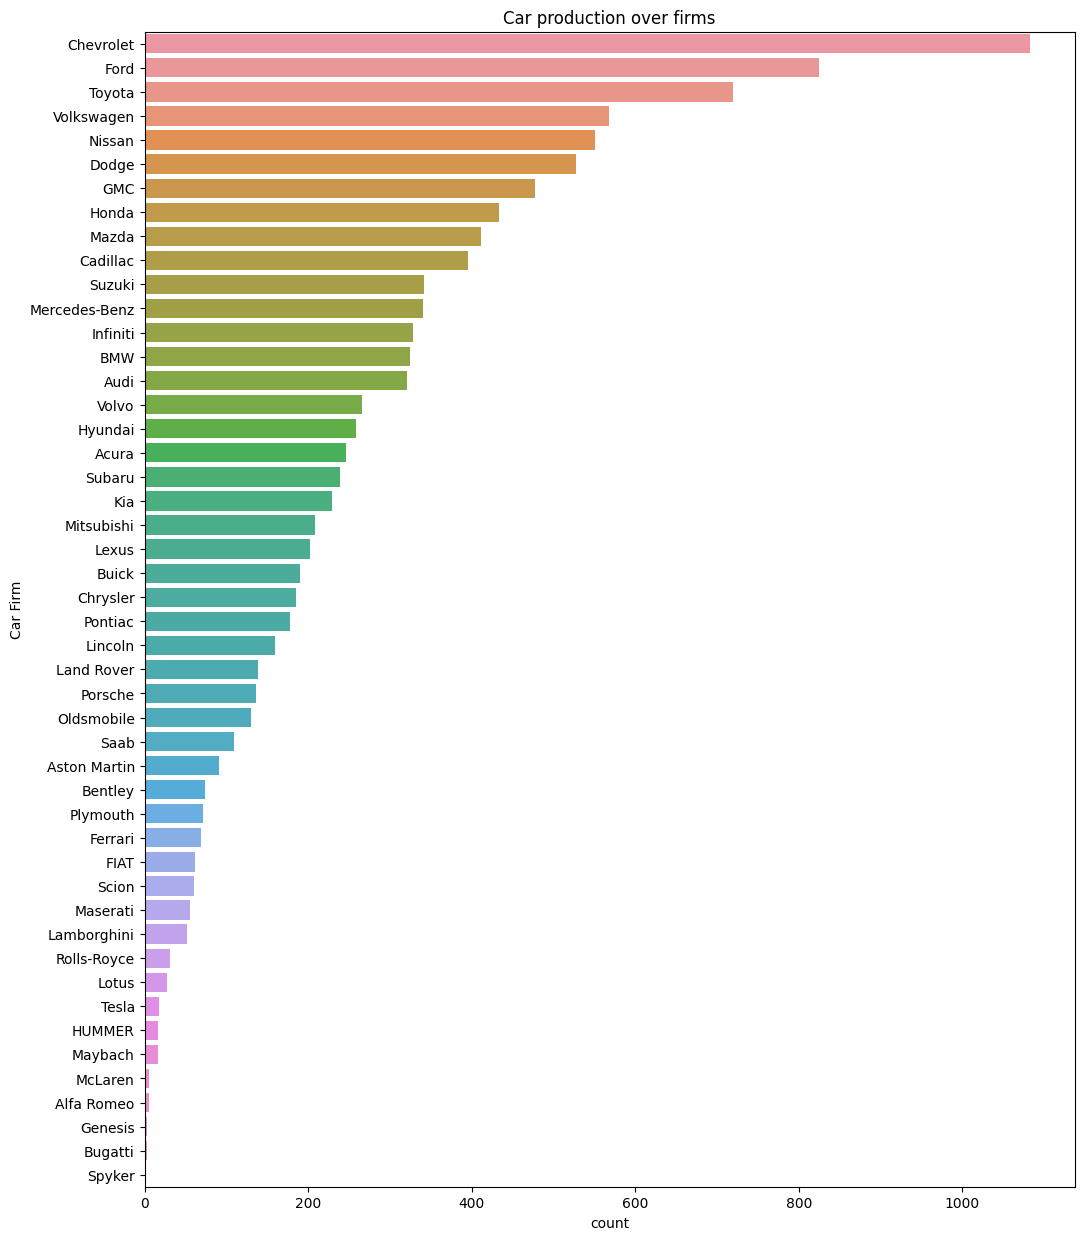

In [192]:
plt.figure(figsize=(12, 15))
sns.countplot(y=df['Firm'], order=df['Firm'].value_counts().index[::], data=df)
plt.title('Car production over firms')
plt.ylabel('Car Firm')
plt.show()

In [193]:
categorical_features = ['Transmission Type', 'Driven_Wheels', 'Engine Cylinders', 'Number of Doors', 'Vehicle Size']

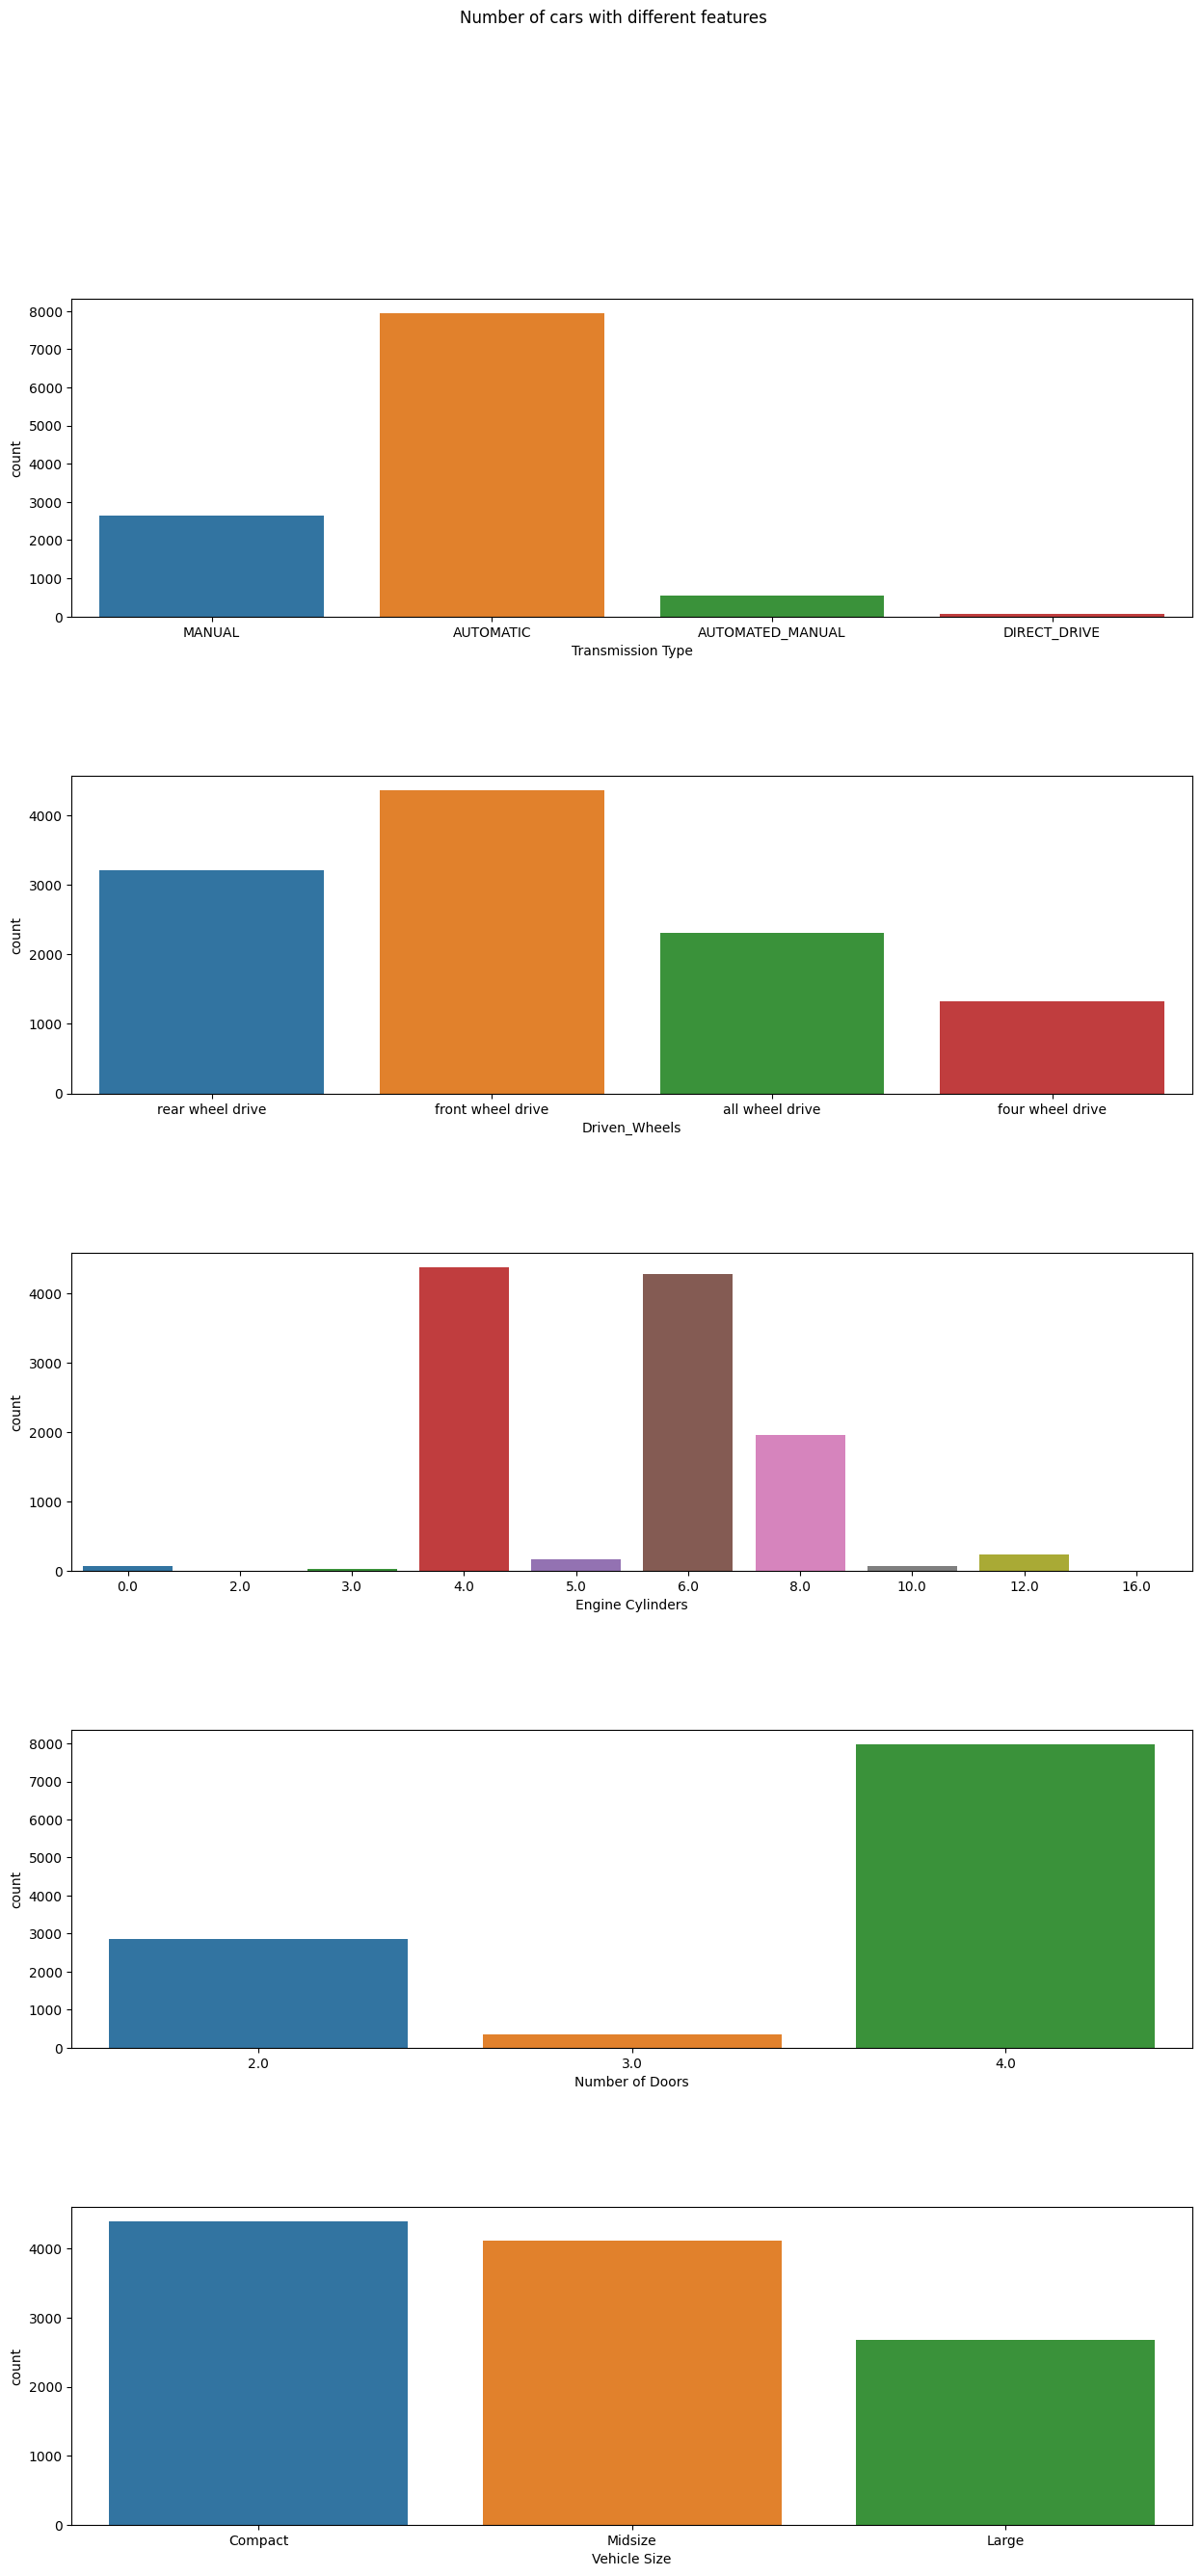

In [194]:
plt.figure(figsize=(15,30))
plt.suptitle('Number of cars with different features')

for idx, feature in enumerate(categorical_features, start=1):
    plt.subplot(5, 1, idx)
    sns.countplot(x=feature, data=df)
    plt.xlabel(feature)

plt.subplots_adjust(hspace=0.5)
plt.show()


Average car price for different categorical car features

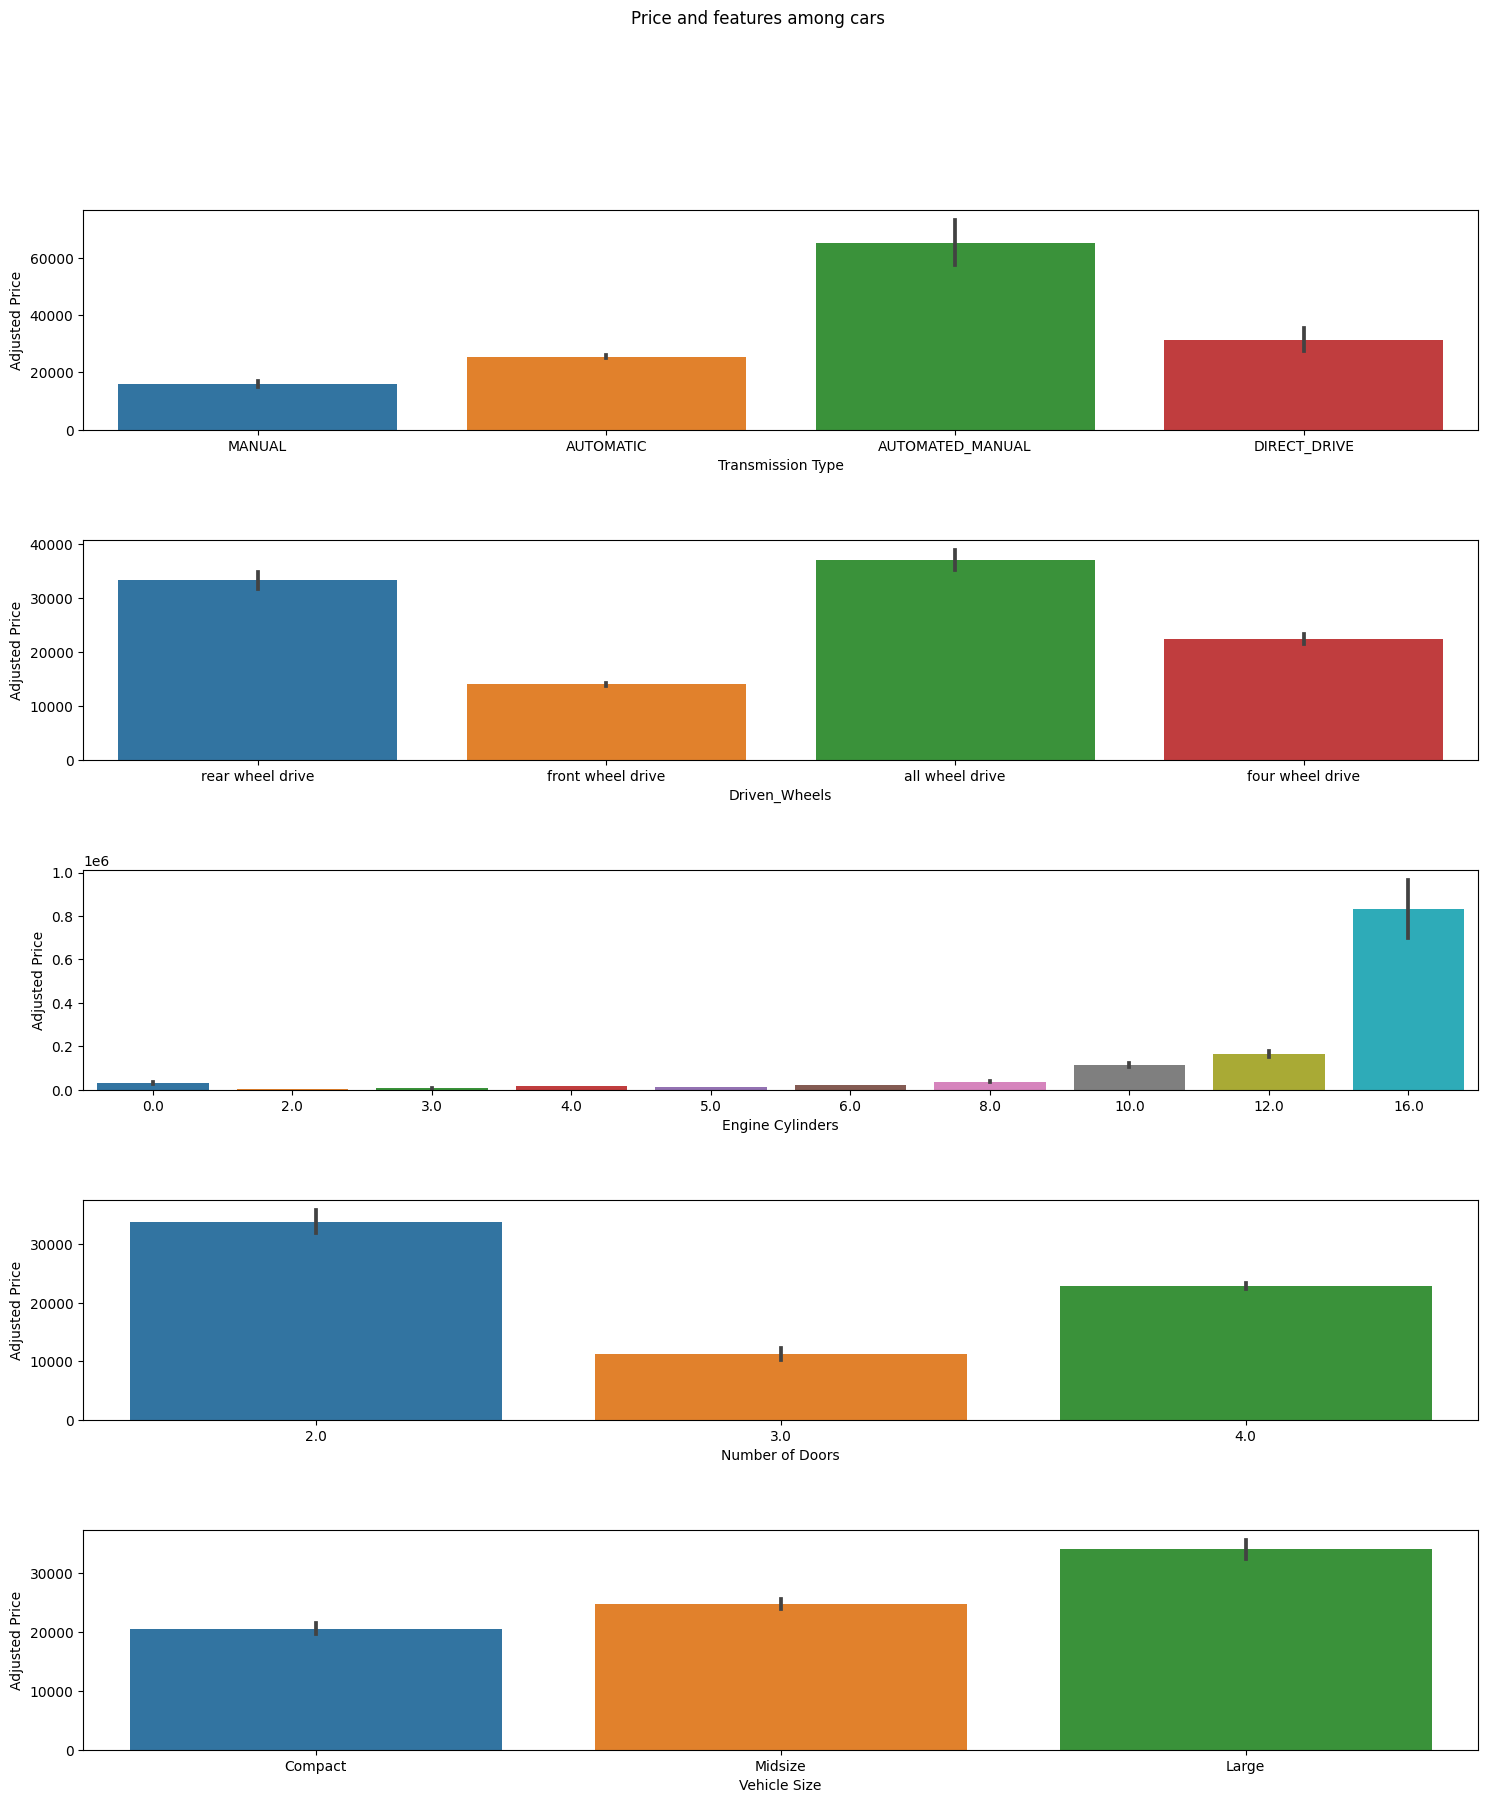

In [195]:
plt.figure(figsize=(18,20))
plt.suptitle('Price and features among cars')

for idx, feature in enumerate(categorical_features, start=1):

    plt.subplot(5, 1, idx)
    sns.barplot(x=feature, y='Adjusted Price', data=df)
    plt.xlabel(feature)
    plt.ylabel('Adjusted Price')

plt.subplots_adjust(hspace=0.5)
plt.show()



We have chosen top 5 firms by most cars records in dataset (aka popularity) but not taking into account attribute popularity here

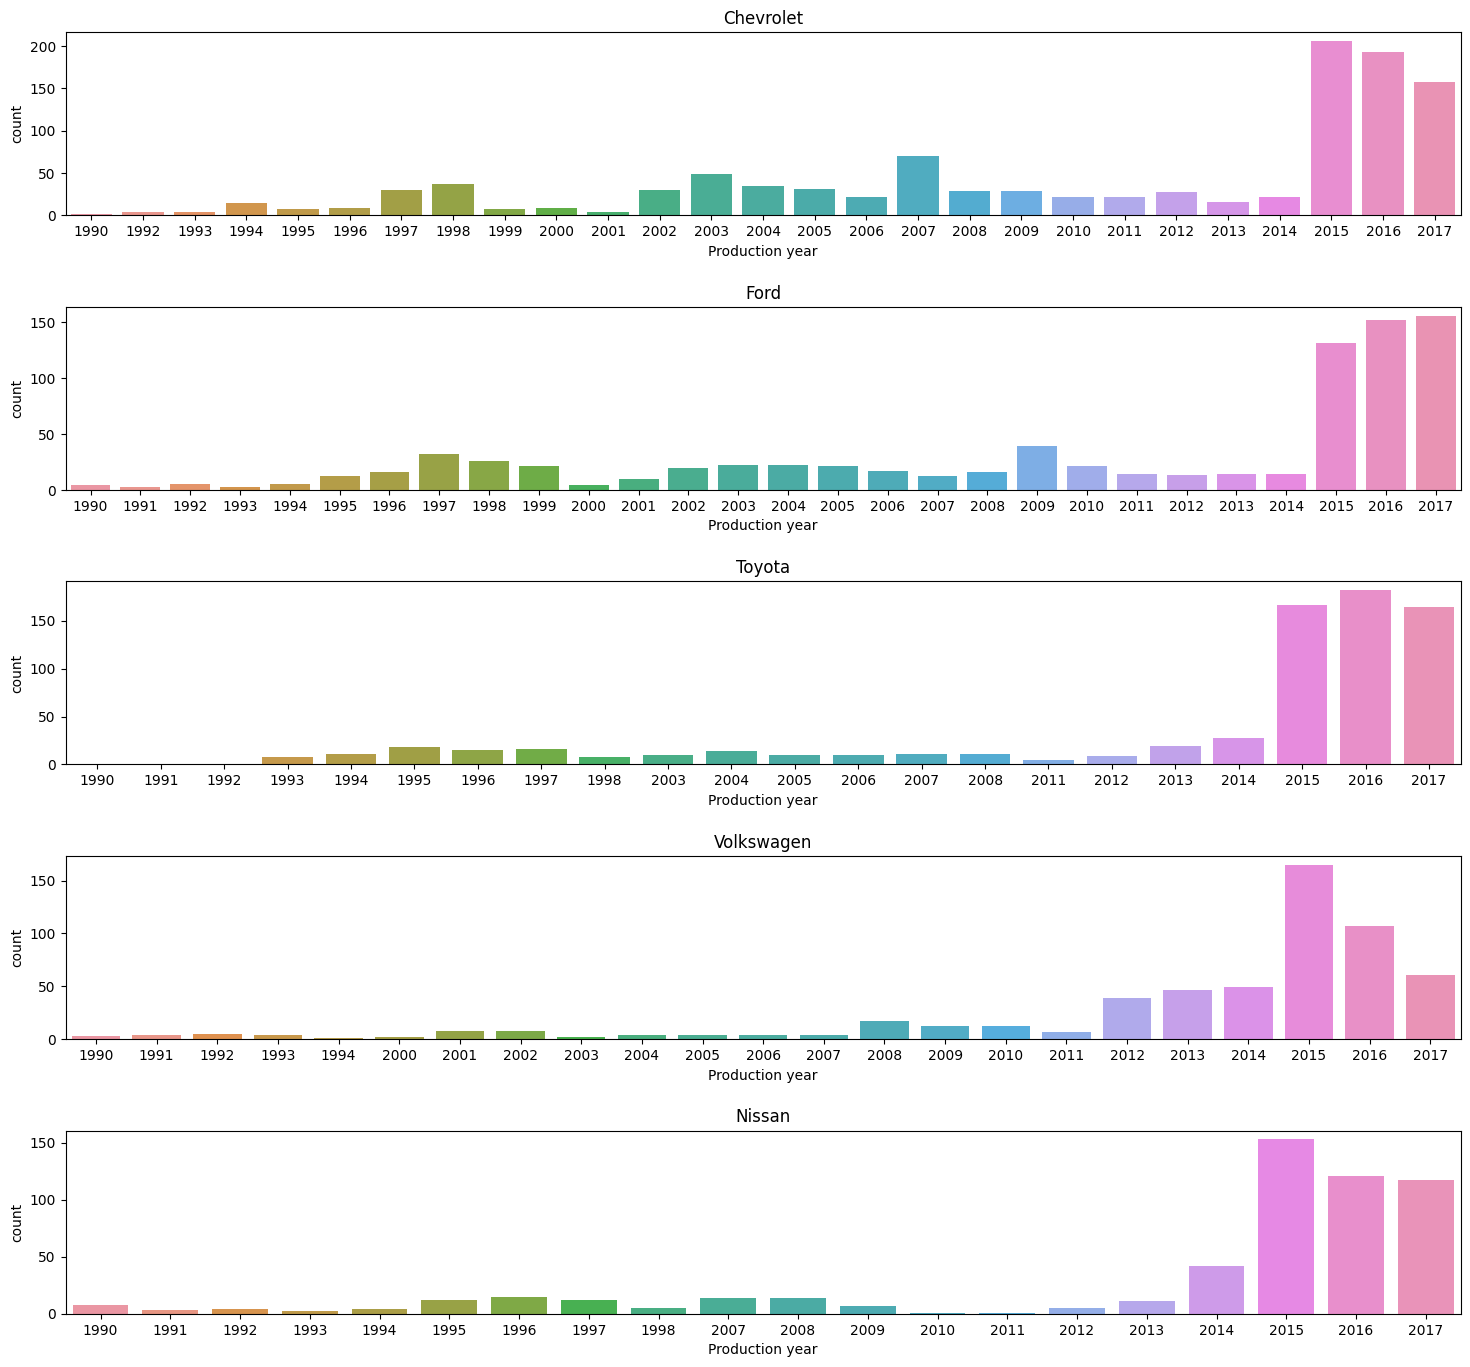

In [196]:
top_five_popular_firms = df['Firm'].value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(18, 170))

for i, firm in enumerate(top_five_popular_firms.index, start=1):
    plt.subplot(len(df['Firm'].unique().tolist()), 1, i)
    sns.countplot(x='Year', data=df[df['Firm'] == firm])
    plt.title(firm)
    plt.xlabel('Production year')


plt.subplots_adjust(hspace=0.5)
plt.show()

Some distribution of price for different car styles

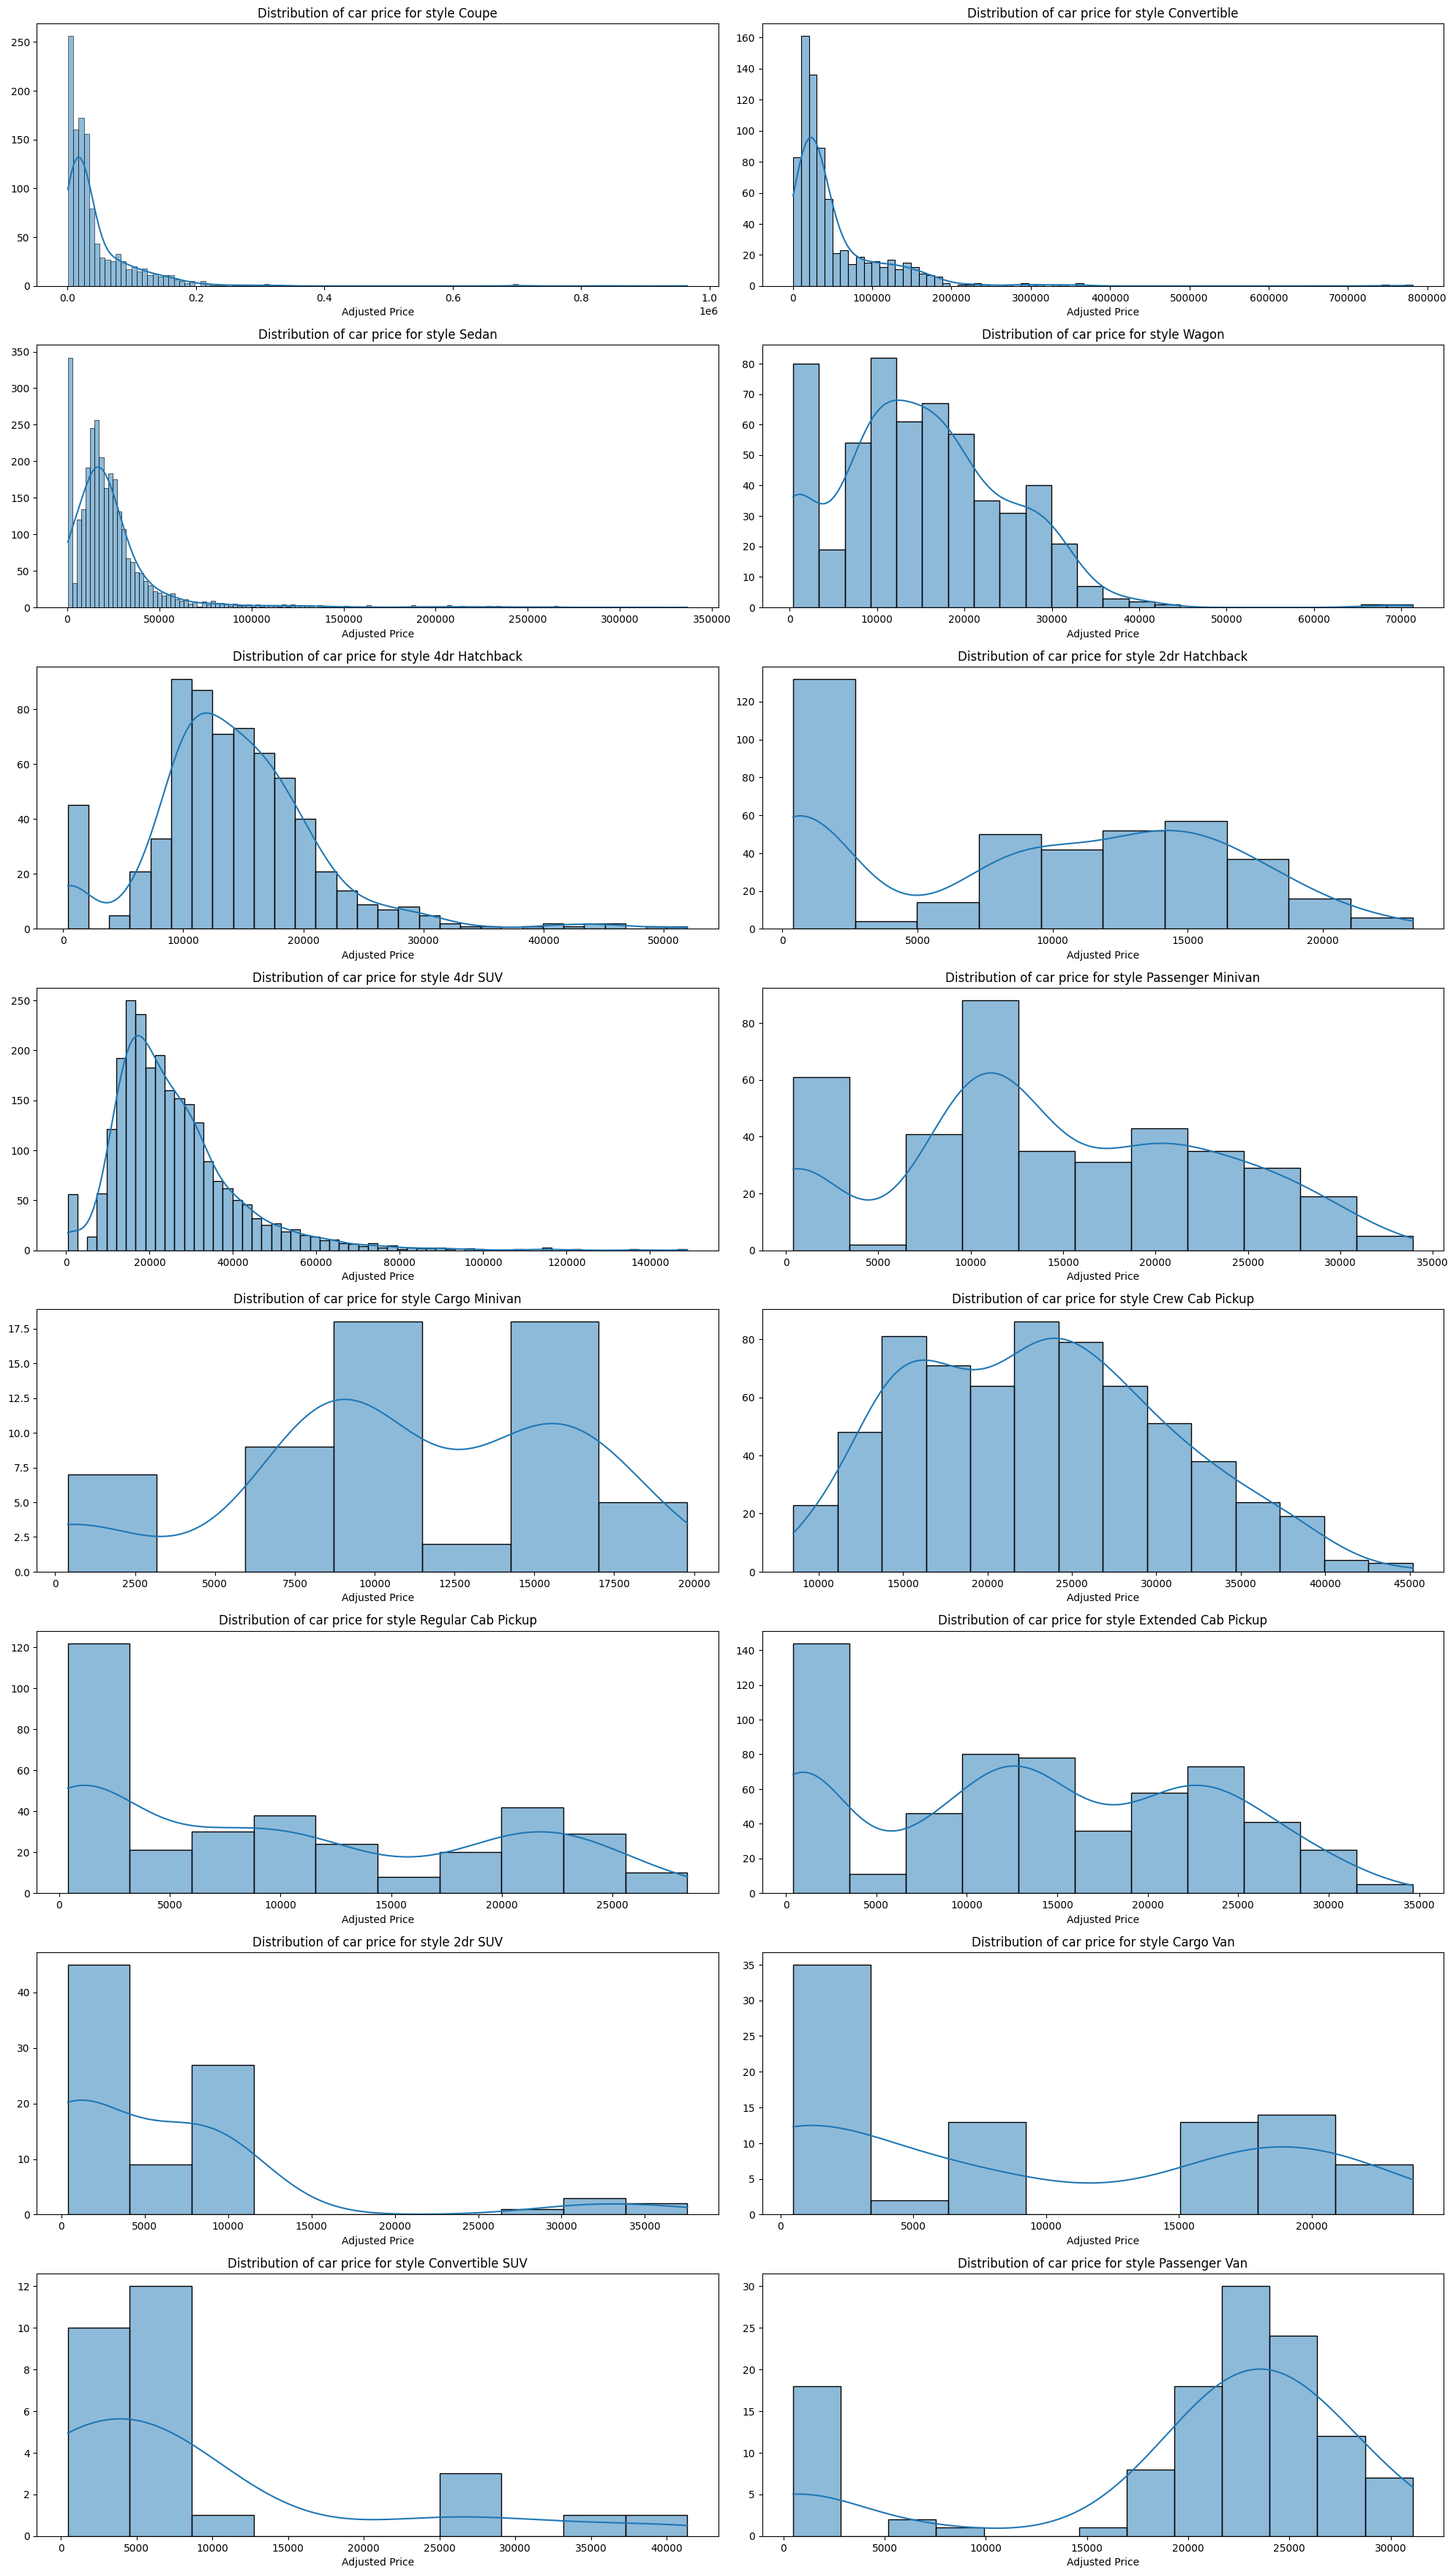

In [197]:
plt.figure(figsize=(20, 70)) 

for i, style in enumerate(df['Vehicle Style'].unique(), start=1):
    plt.subplot(16, 2, i)
    sns.histplot(df[df['Vehicle Style'] == style]['Adjusted Price'], kde=True)
    plt.title(f'Distribution of car price for style {style}')
    plt.xlabel('Adjusted Price')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

Highway MPG: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed. <br>
City MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds. <br>
We convert miles per galon to lites per kilometer mupltiplying by one mile in km and dividing by one gallon in litres for better interpretation in our country

In [198]:
df_size_and_kpl = df.loc[:, ['Vehicle Size', 'highway KPL', 'city KPL']]
df_size_and_kpl

,Vehicle Size,highway KPL,city KPL
0,Compact,11.052576,8.076882
1,Compact,11.902774,8.076882
2,Compact,11.902774,8.501982
3,Compact,11.902774,7.651783
4,Compact,11.902774,7.651783
...,...,...,...
11909,Midsize,9.777279,6.801585
11910,Midsize,9.777279,6.801585
11911,Midsize,9.777279,6.801585
11912,Midsize,9.777279,6.801585


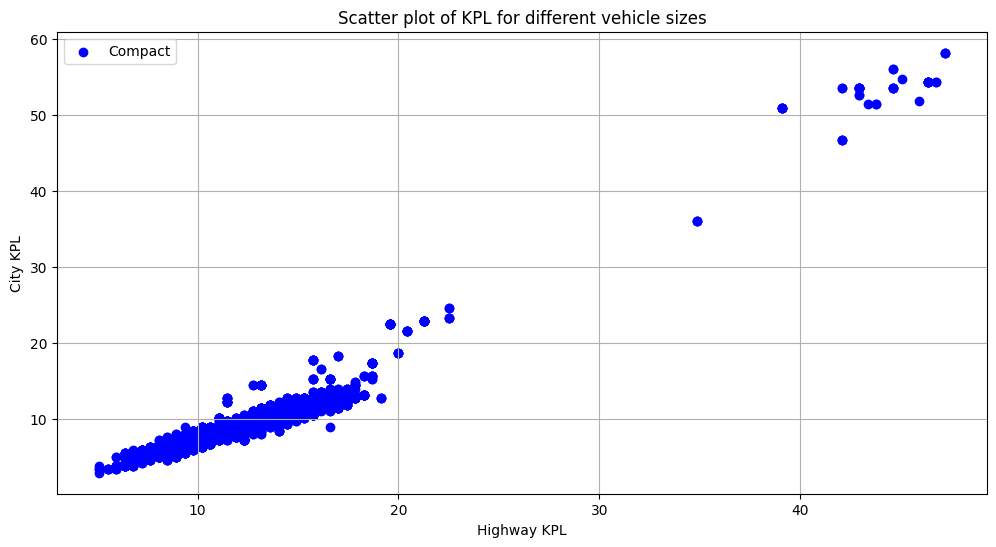

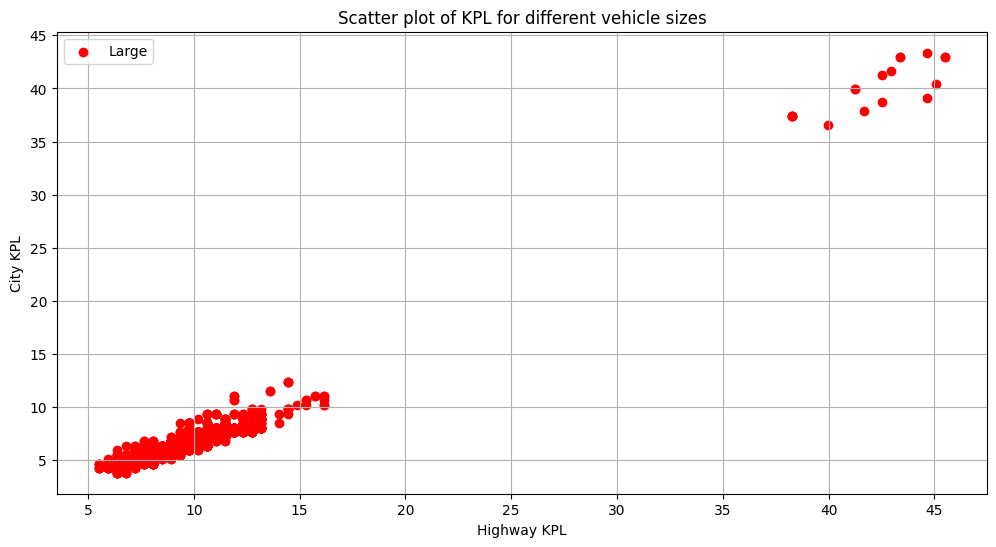

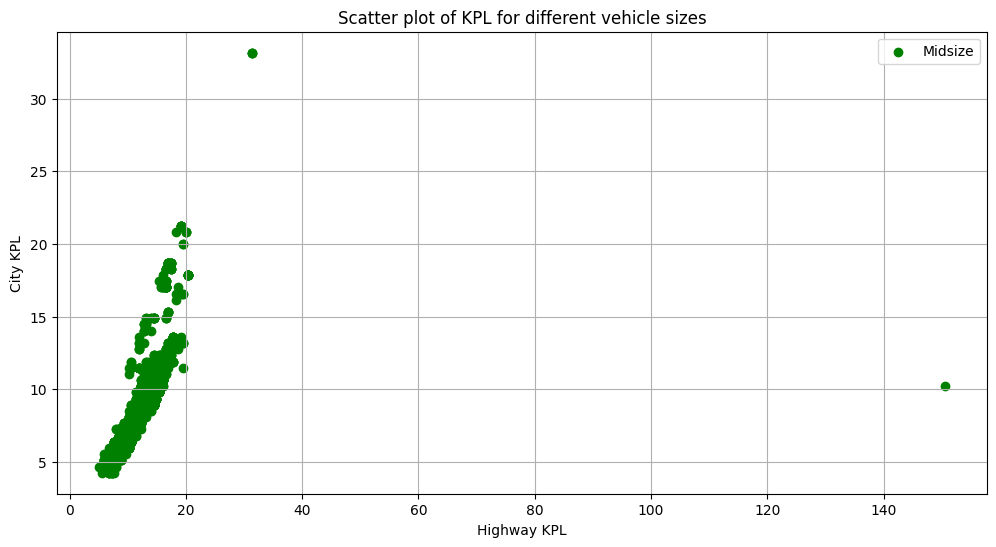

In [199]:
color_map = {'Compact': 'blue', 'Midsize': 'green', 'Large': 'red'}

for name, group in df_size_and_kpl.groupby('Vehicle Size'):
    plt.figure(figsize=(12,6))
    plt.scatter(group['highway KPL'], group['city KPL'], label=name, color=color_map.get(name))
    plt.xlabel('Highway KPL')
    plt.ylabel('City KPL')
    plt.title('Scatter plot of KPL for different vehicle sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

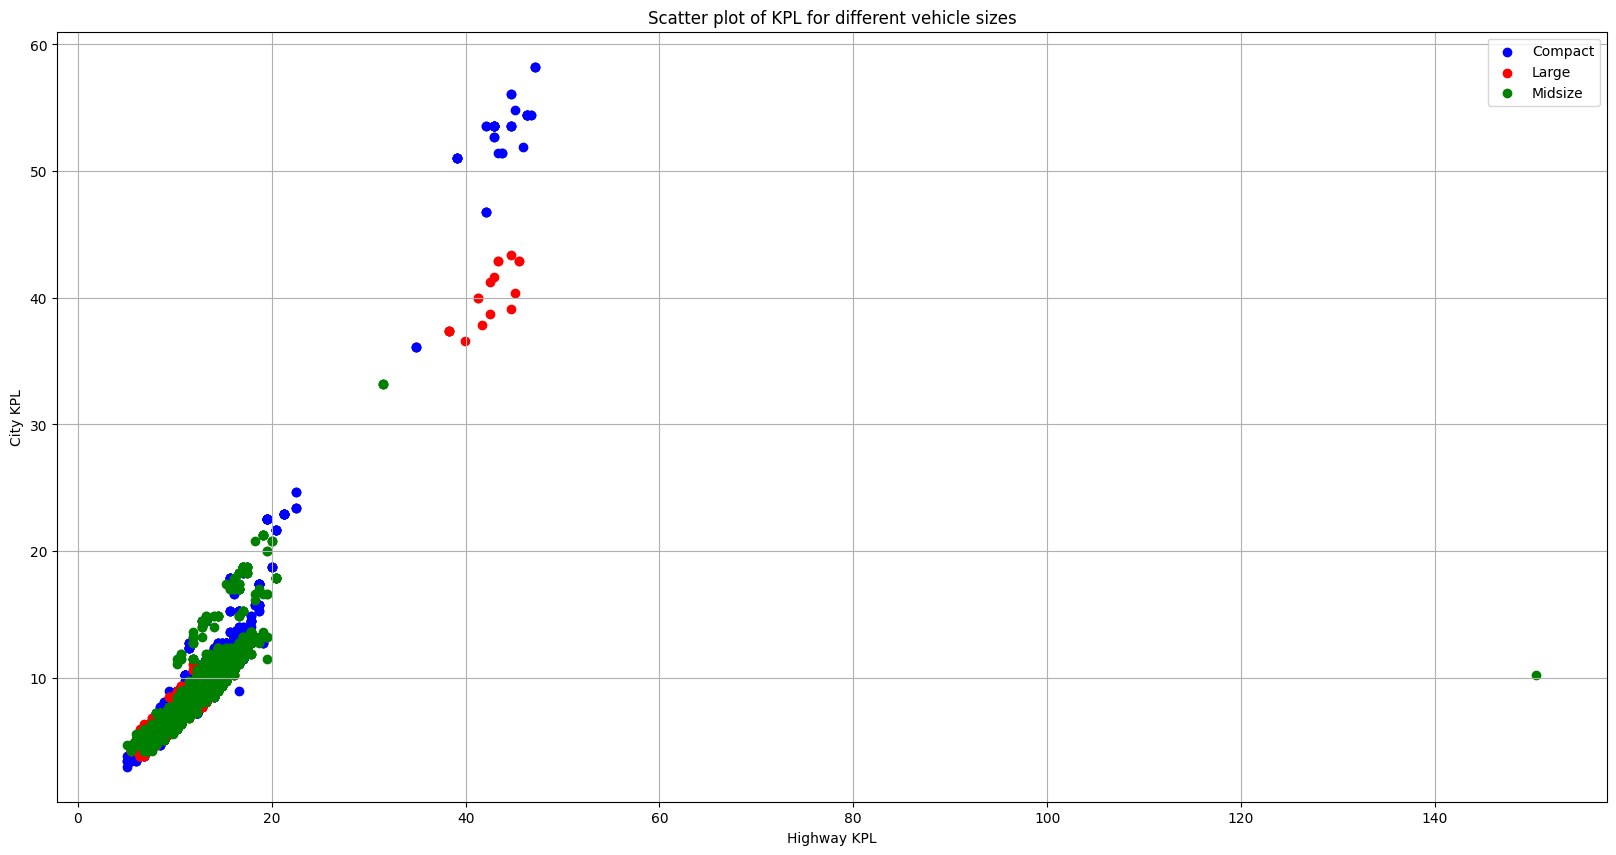

In [200]:
plt.figure(figsize=(20,10))
# Group by 'Vehicle Size'
for name, group in df_size_and_kpl.groupby('Vehicle Size'):
    plt.scatter(group['highway KPL'], group['city KPL'], label=name, color=color_map.get(name))

plt.xlabel('Highway KPL')
plt.ylabel('City KPL')
plt.title('Scatter plot of KPL for different vehicle sizes')
plt.legend()
plt.grid(True)
plt.show()

In [201]:
df_size_and_kpl.groupby('Vehicle Size').mean()

,highway KPL,city KPL
Vehicle Size,,
Compact,12.328551,9.479448
Large,9.581847,6.867522
Midsize,11.360866,8.219615


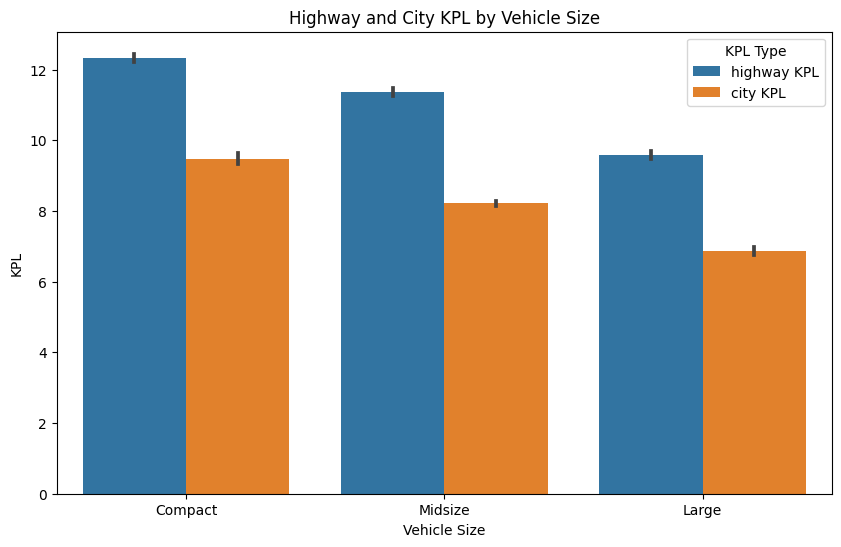

In [202]:
df_melted = pd.melt(df_size_and_kpl, id_vars=['Vehicle Size'], var_name='KPL Type', value_name='KPL')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Vehicle Size', y='KPL', hue='KPL Type')
plt.title('Highway and City KPL by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('KPL')
plt.show()

Transmission type and KPLs

In [203]:
df_transmission_and_kpl = df.loc[:, ['Transmission Type', 'highway KPL', 'city KPL']]
df_transmission_and_kpl

,Transmission Type,highway KPL,city KPL
0,MANUAL,11.052576,8.076882
1,MANUAL,11.902774,8.076882
2,MANUAL,11.902774,8.501982
3,MANUAL,11.902774,7.651783
4,MANUAL,11.902774,7.651783
...,...,...,...
11909,AUTOMATIC,9.777279,6.801585
11910,AUTOMATIC,9.777279,6.801585
11911,AUTOMATIC,9.777279,6.801585
11912,AUTOMATIC,9.777279,6.801585


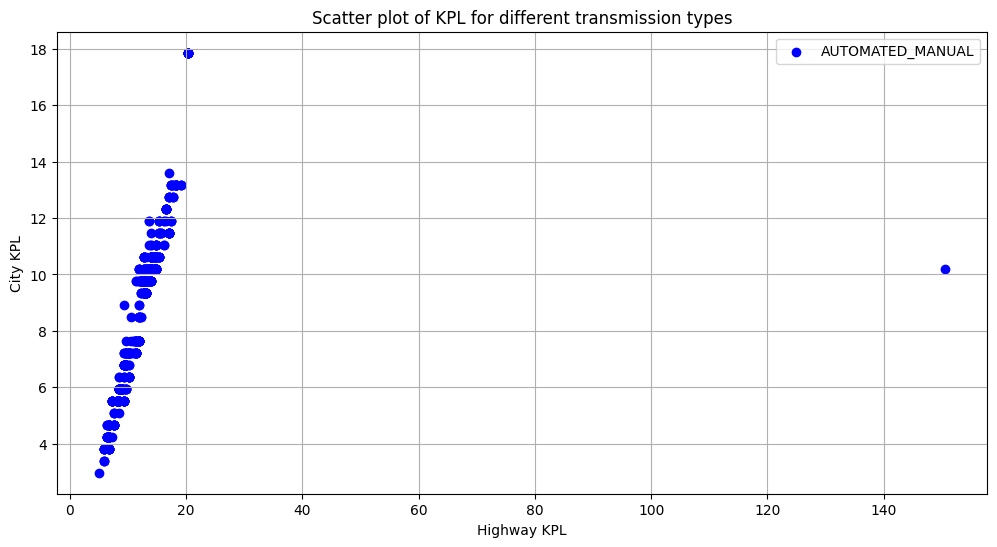

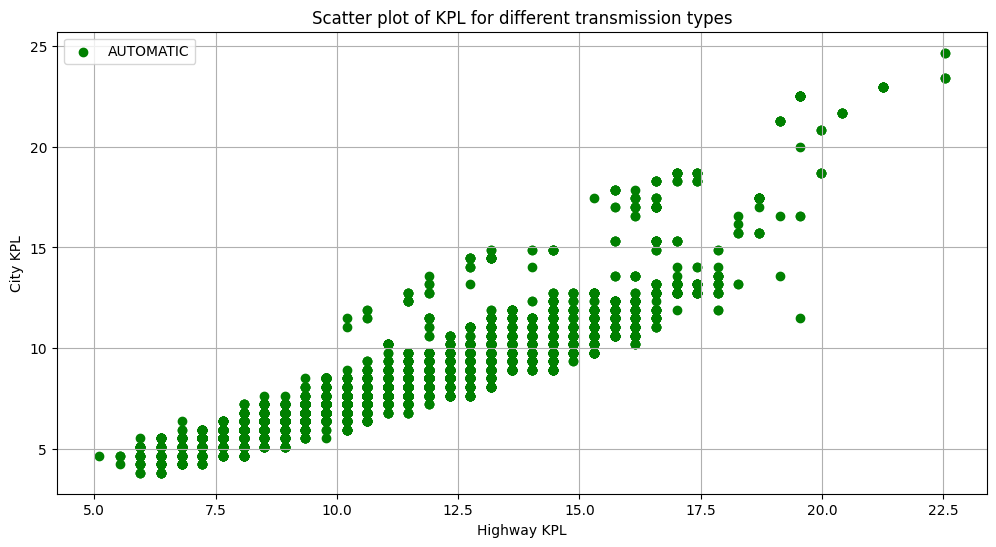

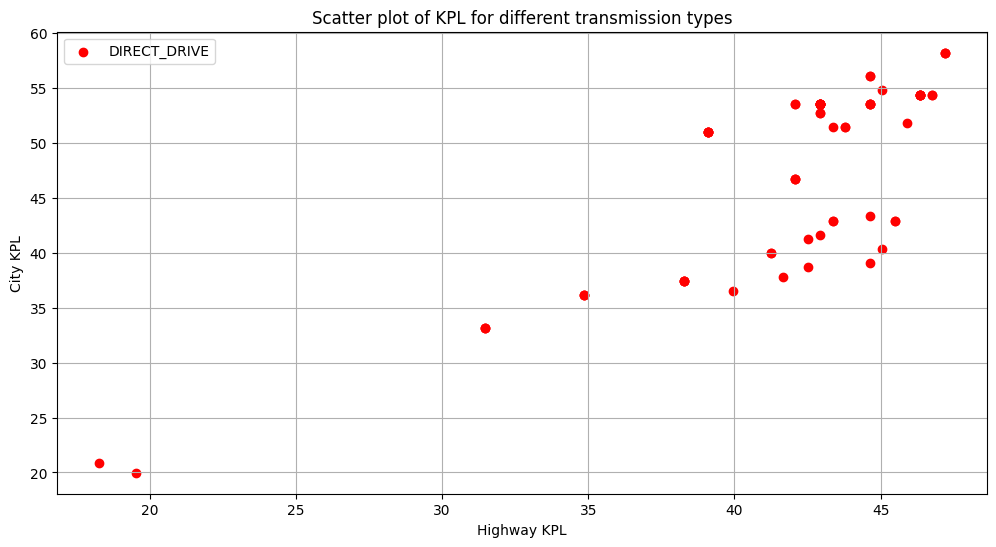

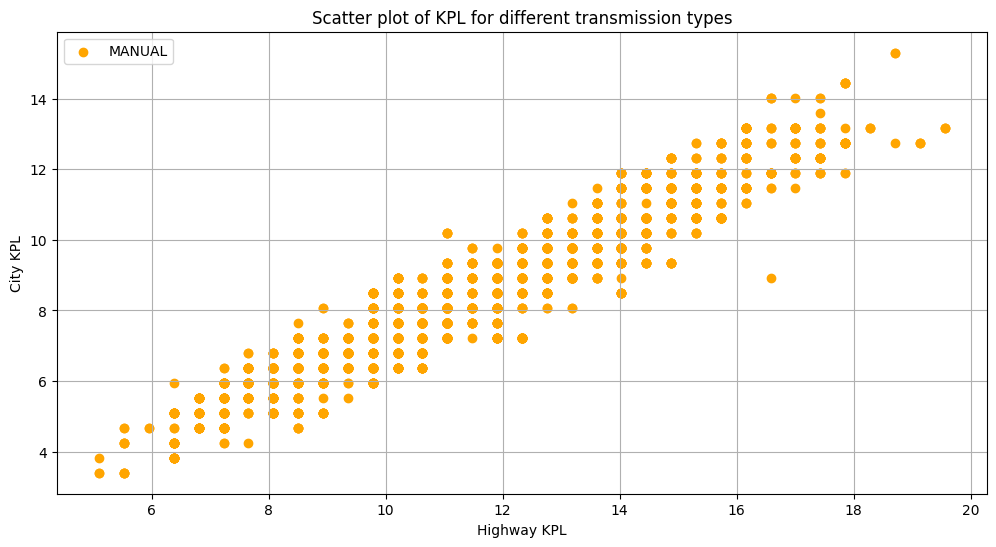

In [204]:
color_map = {'AUTOMATED_MANUAL': 'blue', 'AUTOMATIC': 'green', 'DIRECT_DRIVE': 'red', 'MANUAL': 'orange'}

for name, group in df_transmission_and_kpl.groupby('Transmission Type'):
    plt.figure(figsize=(12,6))
    plt.scatter(group['highway KPL'], group['city KPL'], label=name, color=color_map.get(name))
    plt.xlabel('Highway KPL')
    plt.ylabel('City KPL')
    plt.title('Scatter plot of KPL for different transmission types')
    plt.legend()
    plt.grid(True)
    plt.show()

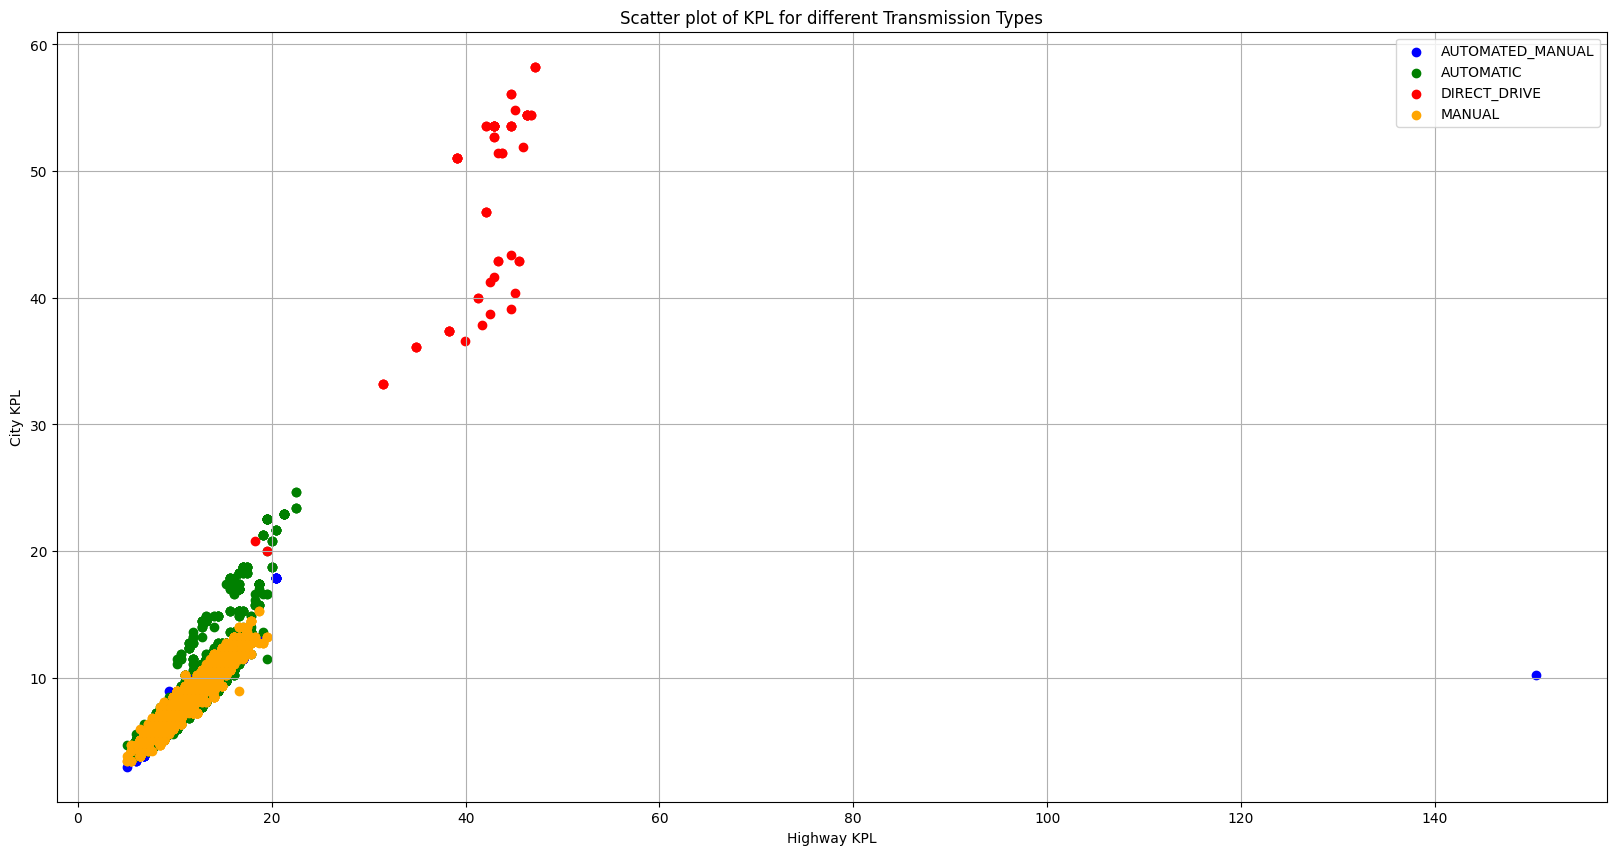

In [205]:
plt.figure(figsize=(20,10))
# Group by Transmission Type
for name, group in df_transmission_and_kpl.groupby('Transmission Type'):
    plt.scatter(group['highway KPL'], group['city KPL'], label=name, color=color_map.get(name))

plt.xlabel('Highway KPL')
plt.ylabel('City KPL')
plt.title('Scatter plot of KPL for different Transmission Types')
plt.legend()
plt.grid(True)
plt.show()

In [206]:
df_transmission_and_kpl.groupby('Transmission Type').mean()

,highway KPL,city KPL
Transmission Type,,
AUTOMATED_MANUAL,12.274832,8.675711
AUTOMATIC,10.932903,8.035616
DIRECT_DRIVE,41.647206,47.098477
MANUAL,11.476868,8.396756


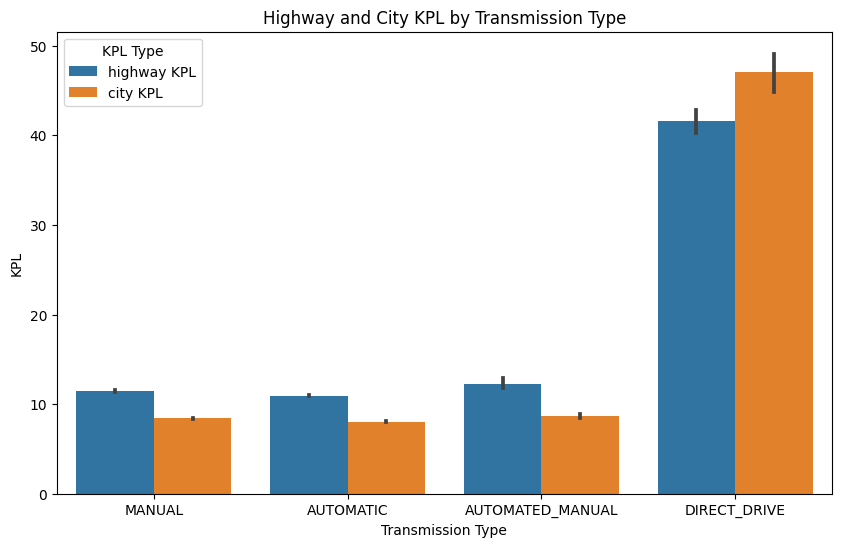

In [207]:
df_melted = pd.melt(df_transmission_and_kpl, id_vars=['Transmission Type'], var_name='KPL Type', value_name='KPL')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Transmission Type', y='KPL', hue='KPL Type')
plt.title('Highway and City KPL by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('KPL')
plt.show()

### Modeling
What affects car price, is popularity significant for car price

Grouping Fuel type into 4 groups for dummy variables

In [208]:
def group_fuel_type(fuel_type):
    if 'premium unleaded' in fuel_type:
        return 'premium unleaded'
    elif 'regular unleaded' in fuel_type or 'flex-fuel (unleaded/E85)' in fuel_type or 'natural gas' in fuel_type:
        return 'regular unleaded'
    elif 'diesel' in fuel_type:
        return 'diesel'
    elif 'electric' in fuel_type:
        return 'electric'
    else:
        return 'other'

df['Fuel_Type_Grouped'] = df['Fuel type'].apply(group_fuel_type)


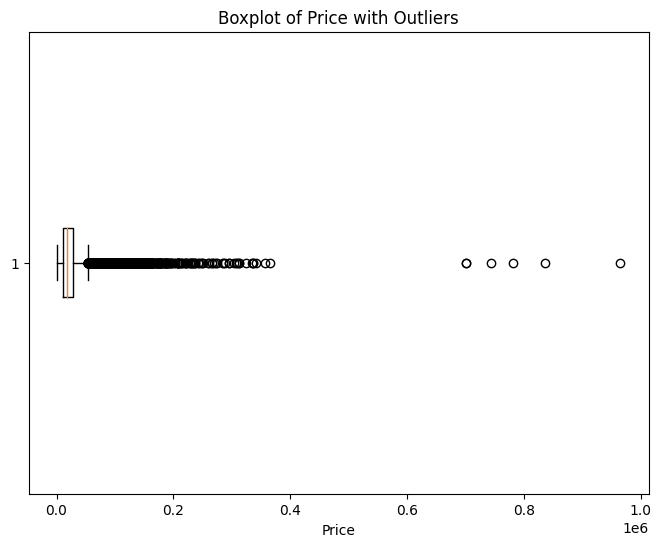

In [209]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Adjusted Price'], vert=False, showfliers=True)
plt.xlabel('Price')
plt.title('Boxplot of Price with Outliers')
plt.show()




Taking only interested columns into model and creating dummy variables with categorical columns

In [210]:
needed_columns = ['Horsepower', 'Engine Cylinders', 'highway KPL', 'city KPL', 'Transmission Type','Fuel_Type_Grouped', 'Vehicle Size', 'Number of Doors', 'Driven_Wheels', 'Popularity', 'Year', 'Adjusted Price']
reg_data = df.loc[:, needed_columns].copy()

reg_data['Age'] = 2024 - reg_data['Year']
reg_data.drop(columns=['Year'], inplace=True)
reg_data = pd.get_dummies(reg_data, columns=['Transmission Type', 'Vehicle Size', 'Driven_Wheels', 'Number of Doors', 'Fuel_Type_Grouped'], prefix=['Transmission', 'Size', 'Wheels', 'Doors', 'Fuel'])
reg_data.columns

Index(['Horsepower', 'Engine Cylinders', 'highway KPL', 'city KPL',
       'Popularity', 'Adjusted Price', 'Age', 'Transmission_AUTOMATED_MANUAL',
       'Transmission_AUTOMATIC', 'Transmission_DIRECT_DRIVE',
       'Transmission_MANUAL', 'Size_Compact', 'Size_Large', 'Size_Midsize',
       'Wheels_all wheel drive', 'Wheels_four wheel drive',
       'Wheels_front wheel drive', 'Wheels_rear wheel drive', 'Doors_2.0',
       'Doors_3.0', 'Doors_4.0', 'Fuel_diesel', 'Fuel_electric',
       'Fuel_premium unleaded', 'Fuel_regular unleaded'],
      dtype='object')

set base group car: midsize car with manual transmission on regular unlreaded fuel with four doors 

In [217]:
X = reg_data.drop(columns=['Transmission_MANUAL', 'Size_Midsize', 'Wheels_front wheel drive', 'Doors_4.0', 'Adjusted Price', 'Fuel_regular unleaded'], axis=1)
X = sm.add_constant(X)
y = reg_data['Adjusted Price']


In [218]:
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     793.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:40:19   Log-Likelihood:            -1.2804e+05
No. Observations:               11187   AIC:                         2.561e+05
Df Residuals:                   11167   BIC:                         2.563e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<AxesSubplot: >

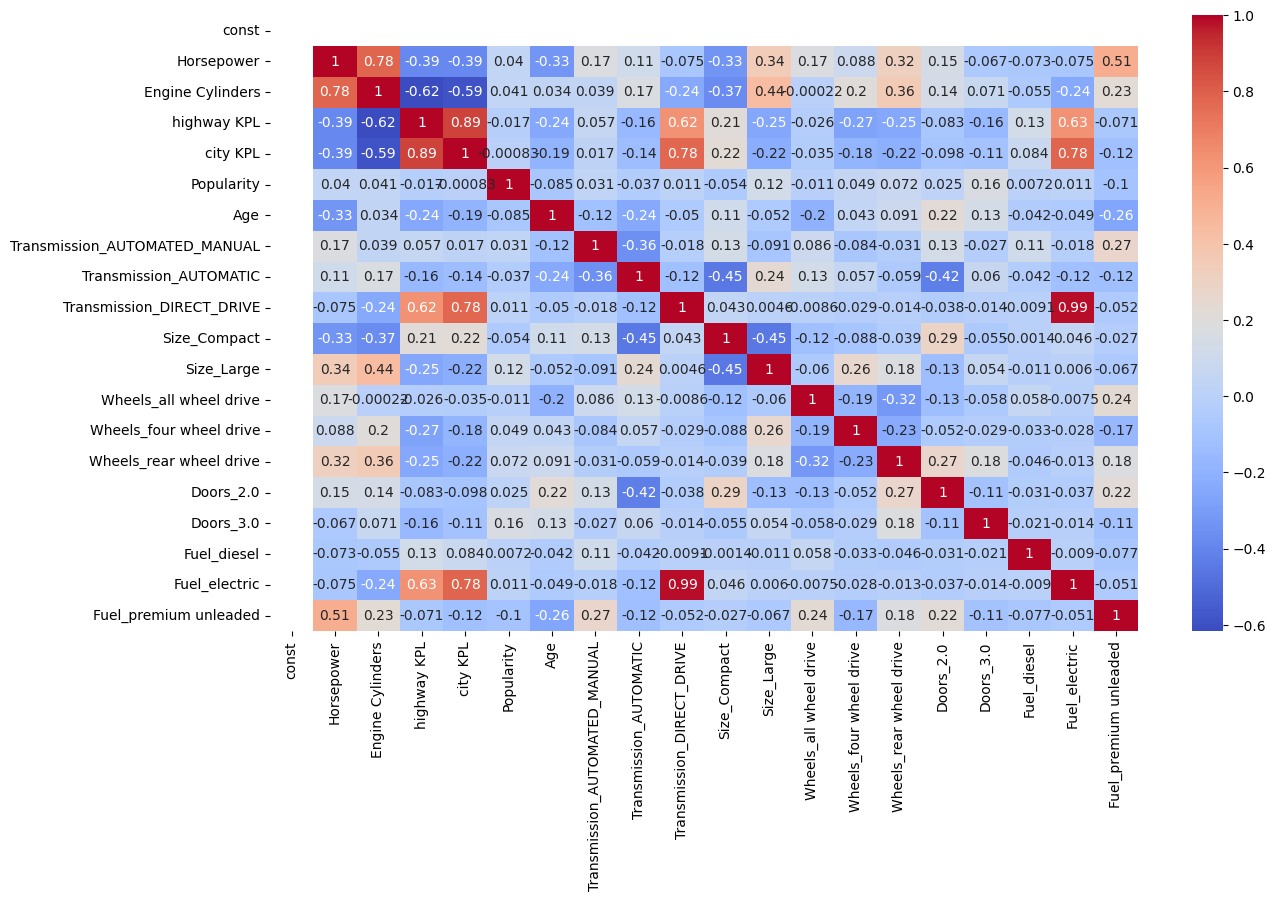

In [219]:
plt.figure(figsize=(14 , 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)


Droping highly correlated variables via heatmap and VIF

In [225]:
to_drop = ['Transmission_DIRECT_DRIVE', 'Engine Cylinders', 'city KPL', 'Fuel_premium unleaded', 'Wheels_all wheel drive', 'Size_Large']
model_1 = sm.OLS(y, X.drop(columns=to_drop)).fit()
print(model_1.summary())
vif = [variance_inflation_factor(model_1.model.exog, i) for i in range(model_1.model.exog.shape[1])]

vif_df = pd.DataFrame({'Variable': model_1.model.exog_names, 'VIF': vif})
vif_df

                            OLS Regression Results                            
Dep. Variable:         Adjusted Price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     1072.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:41:48   Log-Likelihood:            -1.2829e+05
No. Observations:               11187   AIC:                         2.566e+05
Df Residuals:                   11173   BIC:                         2.567e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Variable,VIF
0,const,111.487236
1,Horsepower,2.336592
2,highway KPL,3.611905
3,Popularity,1.063872
4,Age,1.828216
5,Transmission_AUTOMATED_MANUAL,1.307880
6,Transmission_AUTOMATIC,1.756874
7,Size_Compact,1.512588
8,Wheels_four wheel drive,1.332109
9,Wheels_rear wheel drive,1.489847


Some tests for variables with t-test where null hypothesis that variable is statistically insignificant

In [221]:
std_err = model_1.bse['Fuel_premium unleaded']
coeff = model_1.params['Fuel_premium unleaded']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.39786863058392763

In [222]:
std_err = model_1.bse['Wheels_all wheel drive']
coeff = model_1.params['Wheels_all wheel drive']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.20561267755620483

In [224]:
std_err = model_1.bse['Size_Large']
coeff = model_1.params['Size_Large']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.1541909178234333

### Modeling with excluding 75% percentile cars price outliers

In [227]:
filtered_df = df[df['Adjusted Price'] <= df['Adjusted Price'].quantile(0.75)]

Repeating previous steps

In [228]:
needed_columns = ['Horsepower', 'Engine Cylinders', 'highway KPL', 'city KPL', 'Transmission Type','Fuel_Type_Grouped', 'Vehicle Size', 'Number of Doors', 'Driven_Wheels', 'Popularity', 'Year', 'Adjusted Price']
reg_data_1 = filtered_df.loc[:, needed_columns].copy()

reg_data_1['Age'] = 2024 - reg_data_1['Year']
reg_data_1.drop(columns=['Year'], inplace=True)
reg_data_1 = pd.get_dummies(reg_data_1, columns=['Transmission Type', 'Vehicle Size', 'Driven_Wheels', 'Number of Doors', 'Fuel_Type_Grouped'], prefix=['Transmission', 'Size', 'Wheels', 'Doors', 'Fuel'])
reg_data_1.columns

Index(['Horsepower', 'Engine Cylinders', 'highway KPL', 'city KPL',
       'Popularity', 'Adjusted Price', 'Age', 'Transmission_AUTOMATED_MANUAL',
       'Transmission_AUTOMATIC', 'Transmission_DIRECT_DRIVE',
       'Transmission_MANUAL', 'Size_Compact', 'Size_Large', 'Size_Midsize',
       'Wheels_all wheel drive', 'Wheels_four wheel drive',
       'Wheels_front wheel drive', 'Wheels_rear wheel drive', 'Doors_2.0',
       'Doors_3.0', 'Doors_4.0', 'Fuel_diesel', 'Fuel_electric',
       'Fuel_premium unleaded', 'Fuel_regular unleaded'],
      dtype='object')

In [229]:
X = reg_data_1.drop(columns=['Transmission_MANUAL', 'Size_Midsize', 'Wheels_front wheel drive', 'Doors_4.0', 'Adjusted Price', 'Fuel_regular unleaded'], axis=1)
X = sm.add_constant(X)
y = reg_data_1['Adjusted Price']


In [230]:
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     3085.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:41:59   Log-Likelihood:                -78653.
No. Observations:                8390   AIC:                         1.573e+05
Df Residuals:                    8370   BIC:                         1.575e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<AxesSubplot: >

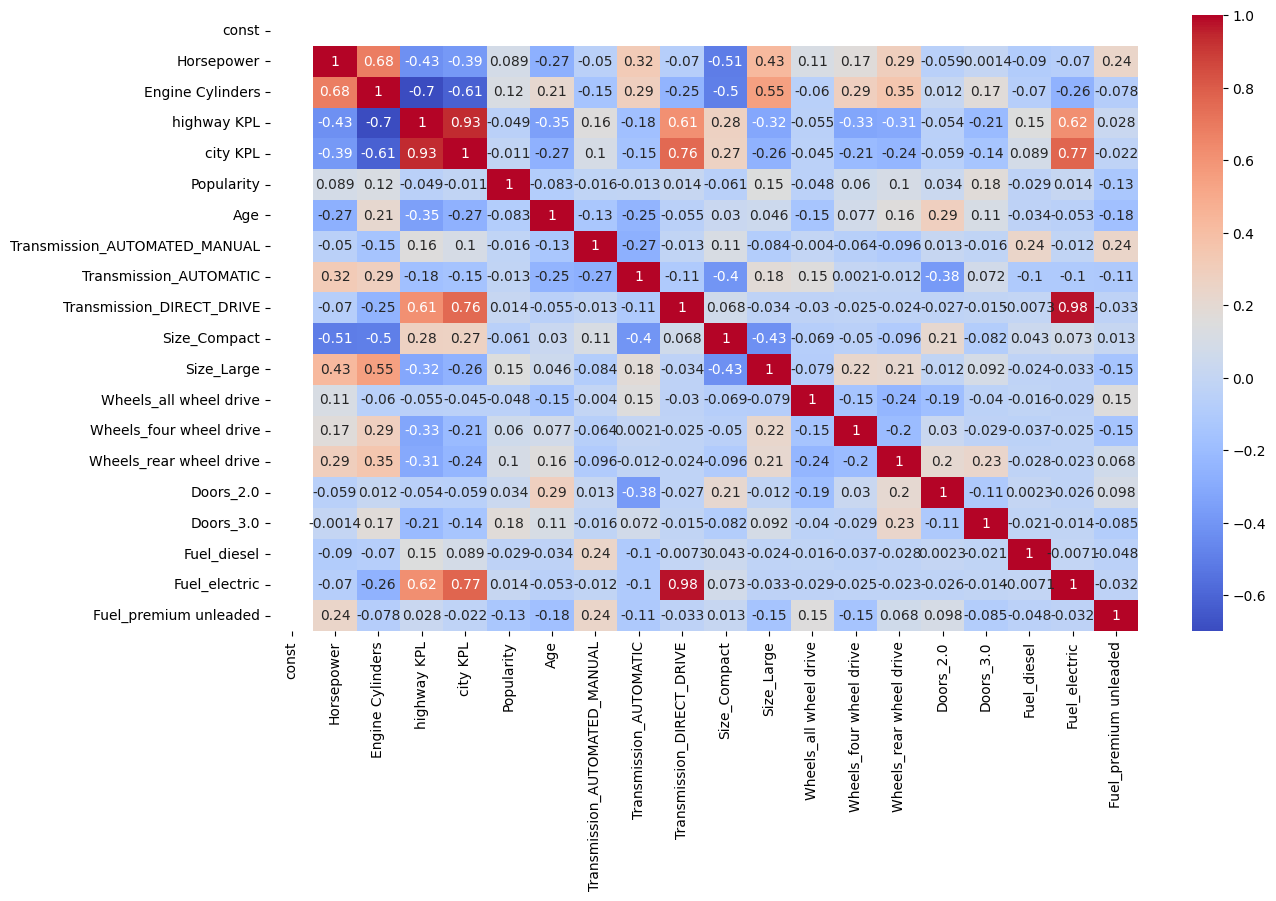

In [ ]:
plt.figure(figsize=(14 , 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)

In [240]:
to_drop = ['Transmission_DIRECT_DRIVE', 'highway KPL', 'Engine Cylinders', 'city KPL', 'Popularity', 'Size_Large', 'Wheels_rear wheel drive', 'Doors_3.0']
model_2 = sm.OLS(y, X.drop(columns=to_drop)).fit()
print(model_2.summary())

# Compute VIF for each variable
vif = [variance_inflation_factor(model_2.model.exog, i) for i in range(model_2.model.exog.shape[1])]

# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': model_2.model.exog_names, 'VIF': vif})
vif_df

                            OLS Regression Results                            
Dep. Variable:         Adjusted Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     5211.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:44:05   Log-Likelihood:                -78739.
No. Observations:                8390   AIC:                         1.575e+05
Df Residuals:                    8378   BIC:                         1.576e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,Variable,VIF
0,const,37.353604
1,Horsepower,1.752325
2,Age,1.336368
3,Transmission_AUTOMATED_MANUAL,1.244902
4,Transmission_AUTOMATIC,1.596157
5,Size_Compact,1.590029
6,Wheels_all wheel drive,1.105161
7,Wheels_four wheel drive,1.115573
8,Doors_2.0,1.319929
9,Fuel_diesel,1.083625


Tests with t-test where null hypothesis that variable is statistically insignificant

In [233]:
std_err = model_2.bse['Popularity']
coeff = model_2.params['Popularity']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.5236524815042505

In [235]:
std_err = model_2.bse['Size_Large']
coeff = model_2.params['Size_Large']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.5394991842971759

In [237]:
std_err = model_2.bse['Wheels_rear wheel drive']
coeff = model_2.params['Wheels_rear wheel drive']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.4077722689545822

In [239]:
std_err = model_2.bse['Doors_3.0']
coeff = model_2.params['Doors_3.0']
t_stat = coeff / std_err
p_value_ = (1-t_dist.cdf(abs(t_stat), df=11187 - 11173))*2
p_value_

0.25406270967462463

Getting another results without luxury and premium cars

### Modeling correlation between vehicle size and fuel efficiency

In [ ]:
df["Vehicle Size"].unique()
df.columns

Index(['Firm', 'Model', 'Year', 'Fuel type', 'Horsepower', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'highway MPG', 'city MPG', 'Popularity', 'Price',
       'Years to Base Year', 'Discount Factor', 'Adjusted Price',
       'highway KPL', 'city KPL', 'Fuel_Type_Grouped'],
      dtype='object')

In [ ]:
df['highway KPL'].unique()
df['city KPL'].unique()

array([ 8.07688243,  8.50198151,  7.65178336,  7.22668428,  6.8015852 ,
       11.05257596,  9.77727873,  9.35217966,  8.92708058, 10.20237781,
        6.37648613, 10.62747688, 12.32787318, 11.90277411, 13.60317041,
       13.17807133, 12.75297226,  5.95138705,  4.25099075, 11.47767503,
        5.1011889 ,  5.52628798,  3.82589168,  4.67608983, 51.86208719,
       51.43698811,  3.4007926 , 21.25495376, 20.82985469, 19.97965654,
       14.87846764, 14.02826948, 17.00396301, 36.1334214 , 54.41268164,
       17.85416116, 18.27926024, 15.30356671, 18.70435931, 53.56248349,
        2.97569353, 14.45336856, 56.11307794, 46.76089828, 58.23857332,
       54.83778071, 16.57886394, 17.42906209, 52.71228534, 15.72866579,
       37.40871863, 39.95931308, 36.55852048, 42.93500661, 40.38441215,
       37.8338177 , 43.36010568, 41.65970938, 39.10911493, 41.2346103 ,
       38.68401585, 22.53025099, 23.38044914, 21.68005284, 22.95535007,
       24.65574637, 33.15772787, 16.15376486, 51.01188904])

Data preparation for linear model

In [ ]:
vehicle_size_mapping = {
    'Compact': 1,
    'Midsize': 2,
    'Large': 3
}

df['Vehicle Size (Mapped)'] = df['Vehicle Size'].map(vehicle_size_mapping)

In [ ]:
X_highway = df[['Vehicle Size (Mapped)']]
y_highway = df['highway KPL']

model_highway = LinearRegression()
model_highway.fit(X_highway, y_highway)

coef_highway = model_highway.coef_[0]
intercept_highway = model_highway.intercept_

print("Highway KPL vs Vehicle Size:")
print("Coefficient:", coef_highway, "Intercept:", intercept_highway)

Highway KPL vs Vehicle Size:
Coefficient: -1.3359423241966193 Intercept: 13.782047813651392


The coefficient is negative (-1.33378), indicating that as the vehicle size increases, the highway kilometers per liter (KPL) decreases. A decrease in KPL suggests reduced fuel efficiency.
The intercept is 13.775, which is the expected highway KPL for the smallest vehicle size (Compact).
For every one-unit increase in vehicle size (e.g., from 'Compact' to 'Midsize'), highway KPL decreases by approximately 1.33 units.

Thus, as vehicle size increases, highway MPG tends to decrease, suggesting that larger vehicles are less fuel-efficient on highways.

In [ ]:
X_city = df[['Vehicle Size (Mapped)']]
y_city = df['city KPL']

model_city = LinearRegression()
model_city.fit(X_city, y_city)

coef_city = model_city.coef_[0]
intercept_city = model_city.intercept_

print("City KPL vs Vehicle Size:")
print("Coefficient:", coef_city, "Intercept:", intercept_city)

City KPL vs Vehicle Size:
Coefficient: -1.3017091494317037 Intercept: 10.794524665225557


Similar to the highway results, the negative coefficient (-1.30013) suggests that as vehicle size increases, city KPL decreases, indicating reduced fuel efficiency.
For every one-unit increase in vehicle size, city KPL decreases by about 1.30 units.
The intercept is 10.789, indicating the expected city KPL for the smallest vehicle size.

### Modeling transmission type and vehicle size

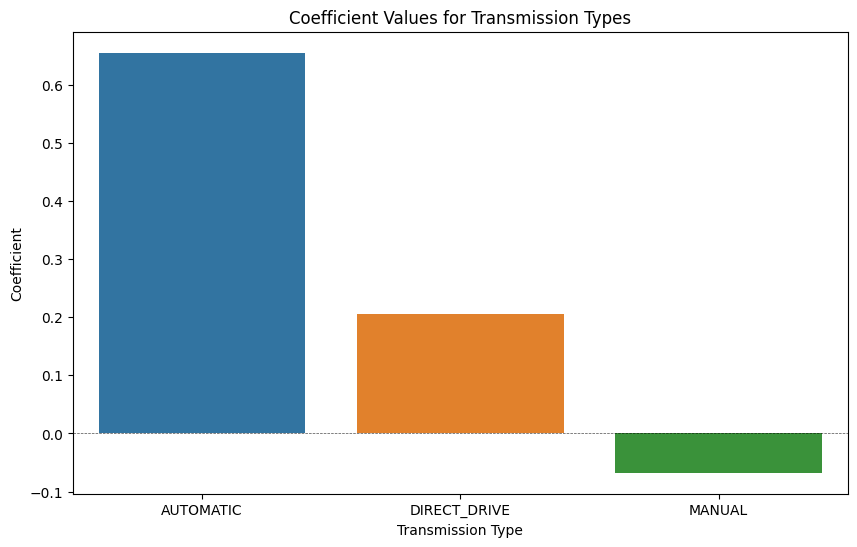

In [ ]:
data = {
    'Transmission Type': ['AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL'],
    'Coefficient': [0.6547, 0.2051, -0.0675]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission Type', y='Coefficient', data=df)
plt.title('Coefficient Values for Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Coefficient')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
plt.show()